# APU: Analitical Propagation Uncertainty - Deep Learning
The chosen dataset was the Airfoil Self-Noise Data Set (http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise), taken from the UCI Machine Learning Repository. The selected predicted variable was "Pressure," and all other variables were considered as predictor variables.



In [544]:
#importação e tratamento dos dados 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn
%matplotlib inline
%reload_ext autoreload
%autoreload 2
df=pd.read_csv('airfoil.csv')
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler(feature_range=(0,1))
df_n = scaler.fit_transform(df)
df_n=pd.DataFrame(df_n)
y=df_n[5]
X=df_n[df_n.columns[0:5]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, shuffle=True, random_state=32)

# Rede Neural 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import numpy as np

# Configurações básicas
input_dim = X_train.shape[1]
# Criando o modelo sequencial
model = Sequential()
# Adicionando a camada de entrada
model.add(Input(shape=(input_dim,)))
# Primeira camada oculta com dropout
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))  # Dropout de 50%
# Segunda camada oculta com dropout
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))  # Dropout de 50%
# Camada de saída
model.add(Dense(1))  # Uma unidade de saída para regressão
# Compilando o modelo
model.compile(optimizer=Adam(),
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Resumo do modelo
model.summary()

# Treinamento do modelo
model.fit(X_train, y_train, epochs=600, batch_size=32, validation_data=(X_test, y_test))

# Métricas para conjunto treino  
from sklearn import metrics
y_hat_train = model.predict(X_train)# passamos  o conjunto de treino pela rede e obtemos as predições 
y_hat_test = model.predict(X_test)# passamos  o conjunto de teste pela rede e obtemos as predições
MAE_T=metrics.mean_absolute_error(y_train, y_hat_train)
R2_T=metrics.r2_score(y_train, y_hat_train);
RMSE_T=metrics.mean_squared_error(y_train, y_hat_train)
MAE_T,R2_T,RMSE_T


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 100)                 │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,801 (42.19 KB)

 Trainable params: 10,801 (42.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/600
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1939 - mean_absolute_error: 0.3688 - val_loss: 0.0272 - val_mean_absolute_error: 0.1367
Epoch 2/600
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0731 - mean_absolute_error: 0.2191 - val_loss: 0.0168 - val_mean_absolute_error: 0.1029
Epoch 3/600
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0514 - mean_absolute_error: 0.1852 - val_loss: 0.0125 - val_mean_absolute_error: 0.0921
Epoch 4/600
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0386 - mean_absolute_error: 0.1603 - val_loss: 0.0114 - val_mean_absolute_error: 0.0867
Epoch 5/600
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0339 - mean_absolute_error: 0.1477 - val_loss: 0.0125 - val_mean_absolute_error: 0.0889
Epoch 6/600
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0310 - mean_absolute_error: 0.1416 - val_loss: 0.0105 - val_mean_absolute_error: 0.0814
Epoch 7/600
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0302 - mean_absolute_error: 0.1413 - val_loss

(0.03745904169696727, 0.9292720397311255, 0.002398081472141629)

In [545]:
# Métricas para conjunto teste
MAE_t=metrics.mean_absolute_error(y_test, y_hat_test)
R2_t=metrics.r2_score(y_test, y_hat_test);
RMSE_t=metrics.mean_squared_error(y_test, y_hat_test)
MAE_t,R2_T,RMSE_T

(0.03686444130151807, 0.9292720397311255, 0.002398081472141629)

Na sequencia faremos a determinação do erro aleatório e erro sistemático em todo o dataset.Estes erros serão importantes para compor a incerteza do modelo, baseado no desempenho. Como queremos um panorama do erro para previsões futuras optou-se por usar todos os dados (treino e teste) que ao passar pelo modelo. Analisaremos também a distribuição dos erros e a localização da média > O esperado é uma curva normal com média=0



47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step


C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_22636\1038606268.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume4=pd.concat([X,y,previsão],axis=1) #criando data frame com os valores do vetor x mais a coluna da previsão


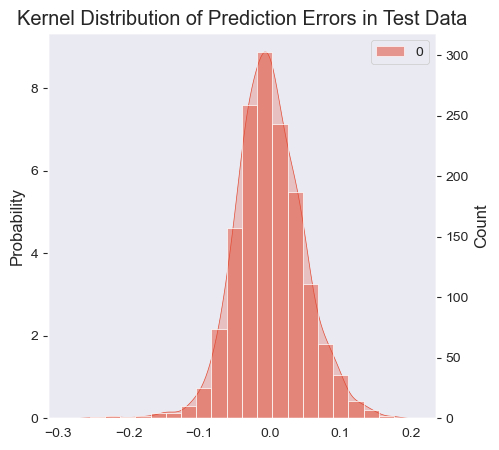

In [697]:
previsão=model.predict(X[:1503])# passando todos os dados pela rede (sem distinção de treino e teste)
previsão=pd.DataFrame(previsão)
df.resume4=pd.concat([X,y,previsão],axis=1) #criando data frame com os valores do vetor x mais a coluna da previsão 
df.resume4.columns=['x1','x2','x3','x4','x5','y','predict']
erro=df.resume4['predict']-df.resume4['y']#determinando o erro entre o real e a predição 

#erro sistemático 
SE=erro.loc[:,].mean()

#erro randômico
RE=erro.loc[:,].std()
erro=pd.DataFrame(erro) # passando para dataframe

# Histograma do erro randômico
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
bins = 20

# Criando o ambiente do gráfico 
sns.set_style("dark")
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# Insere curva KDE (Kernel Density Estimation)
g1 = sns.kdeplot(erro, ax=ax, fill=True)  # fill=True para preencher a área sob a curva
# Insere histograma
ax_copy = ax.twinx()
g2 = sns.histplot(erro, ax=ax_copy, bins=bins, kde=False)
# Ajusta rótulos
g1.set_ylabel("Probability")
g2.set_title("Kernel Distribution of Prediction Errors in Test Data")

plt.show()


Elaboração do gráfico ordenando os dados em ordem e plotando os valores reais e predito no conjunto de teste

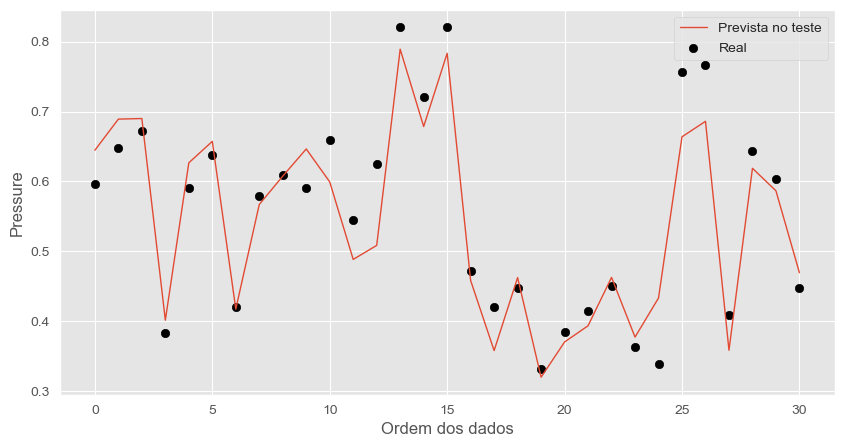

In [699]:
# avaliação conjunto de teste
n = 31
plt.style.use("ggplot")
f = plt.figure(figsize=(10,5))
plt.plot(range(n), y_hat_test, label="Prevista no teste", lw=1)#y_hat_test é a prediçã osobre os dados de teste
plt.scatter(range(n), y_test, color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda1.png")
plt.show()

Acima, a previsão é feita da forma tradicional, isto é, colocando a probabilidade de Dropout em 0%, usando assim toda a capacidade da rede. Esse é o padrão do Keras e precisaremos rescrevê-lo para implementar Monte-Carlo Dropout, no qual mantemos as probabilidades de Dropout de treino também durante as previsões. Abaixo, vamos definir uma função que retornará a última camada da rede, (as previsões) dada a camada de entrada (as variáveis). Além disso, vamos definir que está função será usada tal como durante o treinamento, passando K.learning_phase(). Abaixo realizamos 1000 forwad-passes pela rede neural e obtemos 1000 previsões para cada ponto.

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_22636\968056435.py:40: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume=pd.concat([y_test,mean,desvpad],axis=1)
C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_22636\968056435.py:53: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(erro2, ax=ax,
C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_22636\968056435.py:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level 

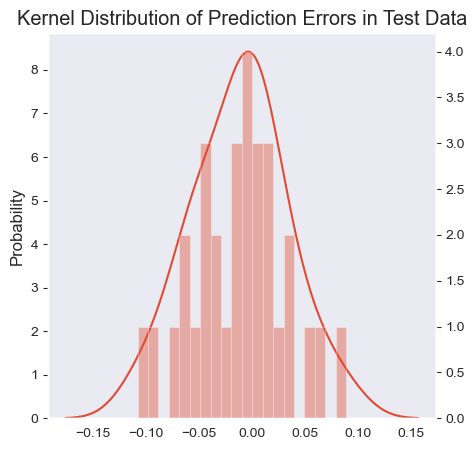

In [701]:
import tensorflow as tf
import numpy as np

# Definir a quantidade de amostras para Monte Carlo
T = 1000
# Função para previsão estocástica
@tf.function
def predict_stochastic(x):
    return model(x, training=True)
# Executar previsões Monte Carlo
y_hat_mc = np.array([predict_stochastic(X_test).numpy() for _ in range(T)])

# Redimensionar as previsões para a forma desejada
y_hat_mc = y_hat_mc.reshape(T, y_test.shape[0]).T
y_hat_mc=pd.DataFrame(y_hat_mc)
yhat=pd.DataFrame(y_hat_mc)

#vamos calcular a média dos 1000 resultados para cada amostra de teste
yhat['mean']=yhat.apply(np.mean,axis=1)

#separamos novamente os 1000 resultados retitrando a coluna média 
yhatd=yhat.iloc[:,0:1000]

#vamos calcular o desvio padrão dos 1000 resultados dos dados de teste
yhatd['std']=yhatd.apply(np.std,axis=1)

#Abaixo os valores reais para y do conjunto de teste
y_test=pd.DataFrame(y_test)

#resetando o índice 
y_test=y_test.reset_index(drop=True)

#retirado a coluna 0
mean=yhat.iloc[:,1000]
mean=pd.DataFrame(mean)
desvpad=yhatd.iloc[:,1000]
desvpad=pd.DataFrame(desvpad)

#colocar tudo em uma tabela
df.resume=pd.concat([y_test,mean,desvpad],axis=1)
erro2=df.resume['mean']-df.resume[5]
es2=erro2.loc[:,].mean()#erro sistemático do modelo
ea2=erro2.loc[:,].std() #erro aleatório do modelo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
bins = 20
# Criando o ambiente do gráfico 
sns.set_style("dark")
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# Insere curva KDE (Kernel Density Estimation)
g1 = sns.distplot(erro2, ax=ax, 
                  kde=True, hist=False) 
# Insere histograma
ax_copy = ax.twinx()
g2 = sns.distplot(erro2, ax=ax_copy, kde=False, hist=True, 
             bins=bins, norm_hist=False)
# Ajusta rótulos
g1.set_ylabel("Probability")
g2.set_title("Kernel Distribution of Prediction Errors in Test Data")
plt.show()

Determinação erro aleatório e sistemático em todos os dados (Dropout)¶

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_22636\1948435027.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(erro3, ax=ax,
C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_22636\1948435027.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g2 = sns.distplot(erro3, ax=ax_copy, kde=False, his

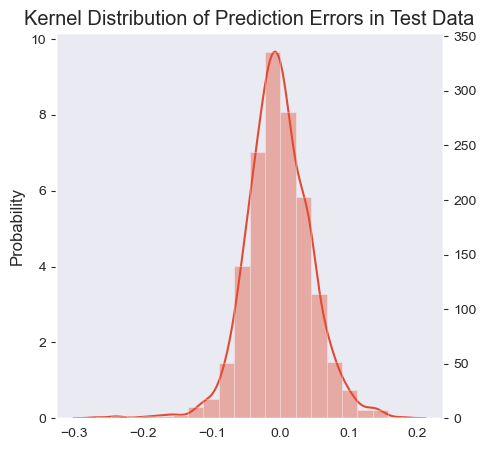

In [703]:
import tensorflow as tf
import numpy as np
# Definir a quantidade de amostras para Monte Carlo
T = 1000
# Função para previsão estocástica
@tf.function
def predict_stochastic(x):
    return model(x, training=True)
# Executar previsões Monte Carlo
y_hat_mct = np.array([predict_stochastic(X).numpy() for _ in range(T)])
# Redimensionar as previsões para a forma desejada
y_hat_mct = y_hat_mct.reshape(T, y.shape[0]).T
yhatt=pd.DataFrame(y_hat_mct)
meanyhatt=yhatt.apply(np.mean,axis=1)
desvyhatt=yhatt.apply(np.std,axis=1)
erro3=meanyhatt-y
es3=erro3.loc[:,].mean()
ea3=erro3.loc[:,].std()

# Criando o ambiente do gráfico 
sns.set_style("dark")
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# Insere curva KDE (Kernel Density Estimation)
g1 = sns.distplot(erro3, ax=ax, 
                  kde=True, hist=False) 
# Insere histograma
ax_copy = ax.twinx()
g2 = sns.distplot(erro3, ax=ax_copy, kde=False, hist=True, 
             bins=bins, norm_hist=False)
# Ajusta rótulos
g1.set_ylabel("Probability")
g2.set_title("Kernel Distribution of Prediction Errors in Test Data")

plt.show()

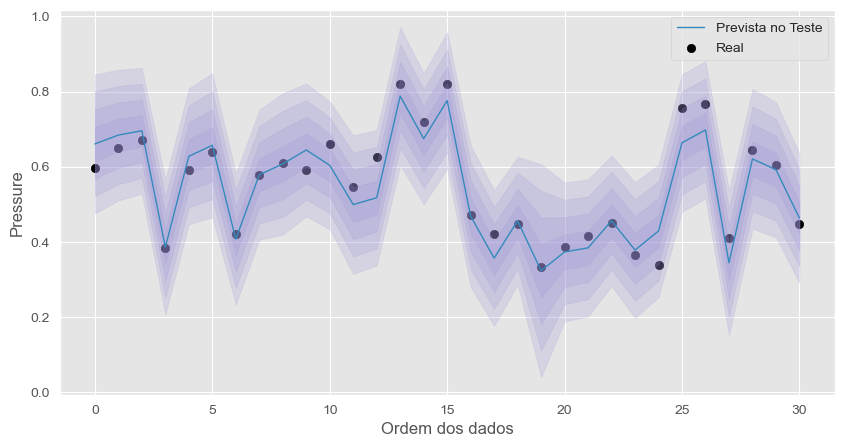

In [704]:
#Computamos média e variância para cada ponto no set de teste.
l = 10
p_dropout =0.5
lbd = 1e-4 
y_hat_test_mean = np.mean(y_hat_mc, axis=1) # média das 1000 previsões para cada ponto 
y_hat_test_variance = np.var(y_hat_mc, axis=1) 
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_test_variance += tau**-1  # variância das 1000 previsões para cada ponto 
n = 31
t = range(n) 
mu = y_hat_test_mean
sigma = np.sqrt(y_hat_test_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,5))
plt.plot(t, mu, label="Prevista no Teste", color="C1", lw=1)
plt.scatter(t, y_test, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2")

plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_test.png")
plt.show()

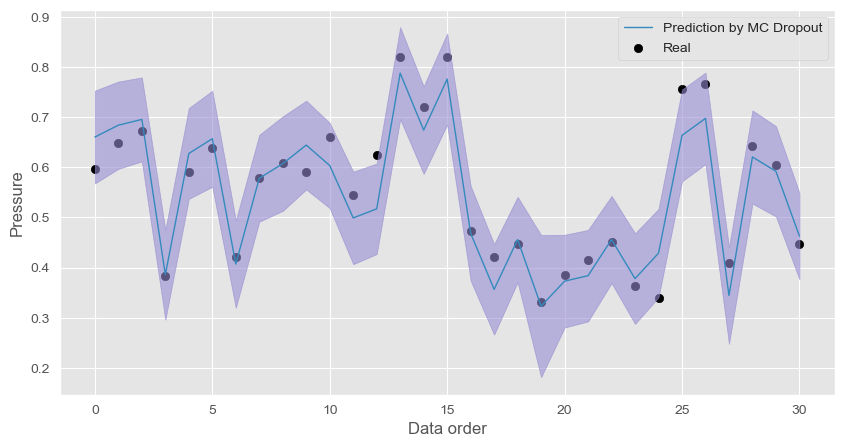

In [705]:
n = 31
t = range(n) 
mu = y_hat_test_mean
sigma = np.sqrt(y_hat_test_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,5))
plt.plot(t, mu, label="Prediction by MC Dropout", color="C1", lw=1)
plt.scatter(t, y_test, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma, mu-sigma, alpha=0.2, color="C2")

plt.ylabel("Pressure")
plt.xlabel("Data order")
plt.legend(loc="best")
f.savefig("rnn_demanda_test.svg")
plt.show()

Determinação das incertezas da rede método APU para o Dataset escolhido

In [707]:
X_test=X_test.reset_index(drop=True)
previsão=model.predict(X_test[:31])
colnames=["Predict"]
previsão1=pd.DataFrame(previsão, columns=colnames)
df.resume3=pd.concat([X_test,y_test,previsão1],axis=1)

# Autodifferentiation

# Assume X_test is the test dataset
x = tf.convert_to_tensor(X_test[:31], dtype=tf.float32)

# Autodifferentiation
with tf.GradientTape() as tape:
    tape.watch(x)
    f_hat = model(x)
autodiff = tape.gradient(f_hat, x).numpy()

    
autodiff=pd.DataFrame(autodiff)
    
autodiff.columns = ['c1', 'c2', 'c3','c4','c5']

upx1=0.0003468*0.5/2
upx2=0.00488*0.5/2
upx3=0.001470*0.5/2
upx4=0.01966*0.5/2
upx5=0.1*0.5/2
upy=0.008*0.5/2

df_n.rename(columns={
    0: 'Frequency',1:'Angle',2:'Length',3:'Velocity',4:'Suction Side',5:'Pressure'   
},inplace=True)

correlation= df_n.corr()
r_12=correlation['Frequency']['Angle']
r_13=correlation['Frequency']['Length']
r_14=correlation['Frequency']['Velocity']
r_15=correlation['Frequency']['Suction Side']
r_23=correlation['Angle']['Length']
r_24=correlation['Angle']['Velocity']
r_25=correlation['Angle']['Suction Side']
r_34=correlation['Length']['Suction Side']
r_35=correlation['Length']['Velocity']
r_45=correlation['Velocity']['Suction Side']

#ucca=incerteza dos dados
u_D=((autodiff['c1']*upx1)**2+
      (autodiff['c2']*upx2)**2+
      (autodiff['c3']*upx3)**2+
      (autodiff['c4']*upx4)**2+
      (autodiff['c5']*upx5)**2+
      2*autodiff['c1']*autodiff['c2']*upx1*upx2*r_12+
      2*autodiff['c1']*autodiff['c3']*upx1*upx3*r_13+
      2*autodiff['c1']*autodiff['c4']*upx1*upx4*r_14+
      2*autodiff['c1']*autodiff['c5']*upx1*upx5*r_15+
      2*autodiff['c2']*autodiff['c3']*upx2*upx3*r_23+
      2*autodiff['c2']*autodiff['c4']*upx2*upx4*r_24+
      2*autodiff['c2']*autodiff['c5']*upx2*upx5*r_25+
      2*autodiff['c3']*autodiff['c4']*upx3*upx4*r_34+
      2*autodiff['c3']*autodiff['c5']*upx3*upx5*r_35+
      2*autodiff['c4']*autodiff['c5']*upx4*upx5*r_45
                  +upy**2)**0.5

#ucce=Erro randômico do modelo 
u_M=((RE)**2)**0.5
#incerteza predição  ucc
u_P=(u_D**2+u_M**2)**0.5
#incerteza expandida (95%) com adição do erro sistemático (SE)
U= 2*u_P+abs(SE)
autodiff['u_D']=u_D
autodiff['u_M']=u_M
autodiff['u_P']=u_P
autodiff['U']=U

df.total= pd.concat([y_test,previsão1,autodiff,sigma], axis=1)
df.total= df.total.rename(columns={5: 'Real',0:'u_M (Dropout)'})





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_22636\401534218.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume3=pd.concat([X_test,y_test,previsão1],axis=1)
C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_22636\401534218.py:75: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.total= pd.concat([y_test,previsão1,autodiff,sigma], axis=1)


In [708]:
df.total
df.total.to_excel('tabela comparativa.xlsx', index=False)

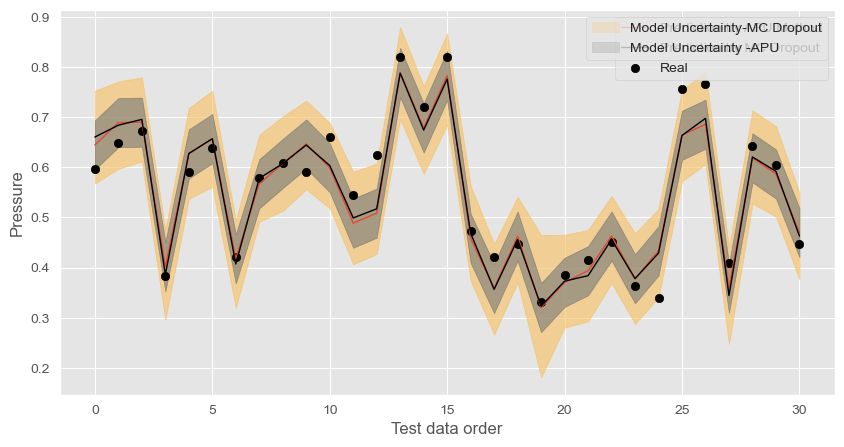

In [709]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

# Exemplo de dados
n = 31
t = range(n)

plt.style.use("ggplot")
f = plt.figure(figsize=(10, 5))
plt.plot(t, df.total['Predict'], label="Prediction by APU Method", color="C7", lw=1)
plt.plot(t, mu, label="Prediction by MC Dropout", color="Black", lw=1)

# Preenchimento das áreas sombreadas
for shade in range(1, 5):
    plt.fill_between(t, mu + sigma, mu - sigma, alpha=0.2, color="C11")
for shade in range(1, 5):
    plt.fill_between(t, df.total['Predict'] - df.total['u_M'], df.total['Predict'] + df.total['u_M'], alpha=0.2, color="C3")

plt.scatter(t, df.total['Real'], color="black", label="Real")

# Labels e legendas
plt.ylabel("Pressure")
plt.xlabel("Test data order")
first_legend = plt.legend(loc="best")

# Criando objetos Patch para a segunda legenda
patch_mc_dropout = mpatches.Patch(color='C11', alpha=0.2, label='Model Uncertainty-MC Dropout')
patch_apu_method = mpatches.Patch(color='C3', alpha=0.2, label='Model Uncertainty -APU ')

# Adicionando a segunda legenda
plt.legend(handles=[patch_mc_dropout, patch_apu_method], loc="upper right")
# Adicionando a primeira legenda de volta ao gráfico
plt.gca().add_artist(first_legend)

f.savefig("rnn_demanda_test3.pdf", format='pdf')
plt.show()

In [710]:
MCCC=pd.concat([df.total['Real'],df.total['Predict'],df.total['u_D'],df.total['u_M'],df.total['u_P'],df.total['U']],axis=1)
# Definir os nomes das colunas
nomes_colunas = ['Real','GUM Predict','GUM Aleatoric Uncertainty','GUM Epistemic Uncertainty','GUM Preditive Uncertainty','GUM_U_exp']
# Atribuir os nomes das colunas ao DataFrame
MCCC.columns = nomes_colunas
#MCCC
#MCCC tabela com as discriminações das incertezas 


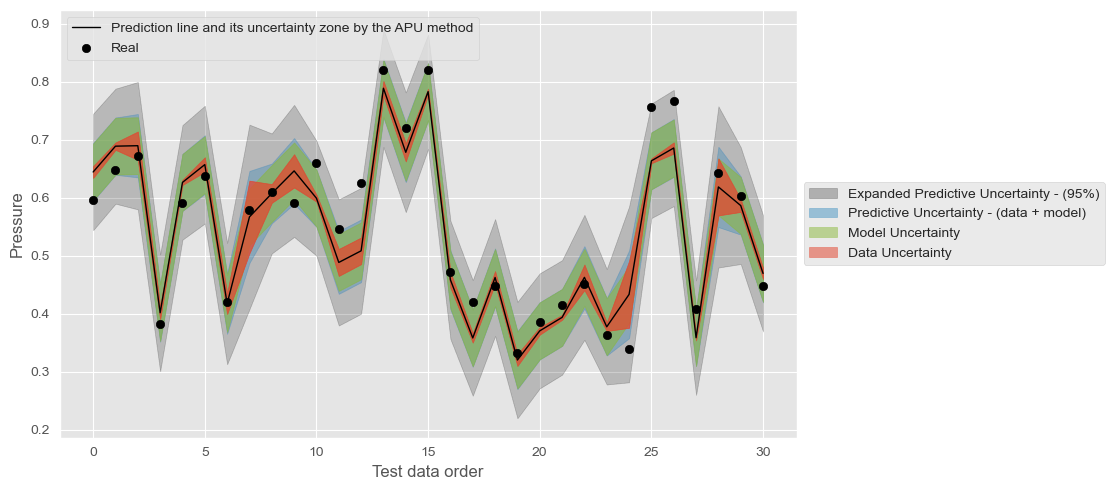

In [711]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

# Exemplo de dados
n = 31
t = range(n)

plt.style.use("ggplot")
f = plt.figure(figsize=(15, 5))
plt.plot(t, MCCC['GUM Predict'], label='Prediction line and its uncertainty zone by the APU method', color="Black", lw=1)

# Preenchimento das áreas sombreadas
for shade in range(1, 5):
    plt.fill_between(t, MCCC['GUM Predict'] - MCCC['GUM_U_exp'], MCCC['GUM Predict'] + MCCC['GUM_U_exp'], alpha=0.05, color="black")
for shade in range(1, 5):
    plt.fill_between(t, MCCC['GUM Predict'] - MCCC['GUM Preditive Uncertainty'], MCCC['GUM Predict'] + MCCC['GUM Preditive Uncertainty'], alpha=0.1, color="C8")
for shade in range(1, 5):
    plt.fill_between(t, MCCC['GUM Predict'] - MCCC['GUM Epistemic Uncertainty'], MCCC['GUM Predict'] + MCCC['GUM Epistemic Uncertainty'], alpha=0.2, color="C5")
for shade in range(1, 5):
    plt.fill_between(t, MCCC['GUM Predict'] - MCCC['GUM Aleatoric Uncertainty'], MCCC['GUM Predict'] + MCCC['GUM Aleatoric Uncertainty'], alpha=0.3, color="C7")

plt.scatter(t, MCCC['Real'], color="black", label="Real")

plt.ylabel("Pressure")
plt.xlabel("Test data order")

# Primeira legenda para as linhas e pontos
first_legend = plt.legend(loc="upper left")

# Criando objetos Patch para a segunda legenda
patch_exp = mpatches.Patch(color='black', alpha=0.25, label='Expanded Predictive Uncertainty - (95%)')
patch_pred = mpatches.Patch(color='C8', alpha=0.454, label='Predictive Uncertainty - (data + model)')
patch_epi = mpatches.Patch(color='C5', alpha=0.53, label='Model Uncertainty')
patch_ale = mpatches.Patch(color='C7', alpha=0.54, label='Data Uncertainty')

# Adicionando a segunda legenda externamente
plt.legend(handles=[patch_exp, patch_pred, patch_epi, patch_ale], loc="center left", bbox_to_anchor=(1, 0.5))
# Adicionando a primeira legenda de volta ao gráfico
plt.gca().add_artist(first_legend)

plt.tight_layout(rect=[0, 0, 0.75, 1])  # Ajuste para evitar cortes
f.savefig("rnn_demanda_test4.pdf", format='pdf', bbox_inches='tight')
plt.show()


In [712]:
#definindo um vi 

x1=0.040404
x2= 0.783784
x3=0.000000
x4=1.000000
x5=0.270697
data = { 'x1': [x1],'x2': [x2],'x3': [x3],'x4': [x4],'x5': [x5]
}

#Estimando as incertezas para cada uma das variáveis de entrada baseando-se na avaliação dos sensores utilizados 

upx1=0.0003468*0.5/2
upx2=0.00488*0.5/2
upx3=0.001470*0.5/2
upx4=0.01966*0.5/2
upx5=0.1*0.5/2
upy=0.008*0.5/2

# Construindo a matriz das incertezas - M1
I = [
    [upx1**2, upx1*upx2,upx1*upx3,upx1*upx4,upx1*upx5],[0, upx2**2,upx2*upx3,upx2*upx4,upx2*upx5],
    [0, 0,upx3**2,upx3*upx4,upx3*upx5], [0, 0,0,upx4**2,upx4*upx5],
   [0, 0,0,0,upx5**2]]
Id=pd.DataFrame(I)

#matriz dos coeficientes de correlação - M2
correlation= df_n.corr()
matriz =correlation.values

# Matriz das covariâncias - M3
A = I
B = matriz

# Criando uma nova matriz M3 multiplicando os elementos correspondentes de A e B
C = []

for i in range(len(A)):
    new_row = []
    for j in range(len(A[0])):
        new_row.append(A[i][j] * B[i][j])
    C.append(new_row)

#Determinação das derivadas para o vetor input vi

x_input = tf.constant([[x1, x2, x3, x4, x5]], dtype=tf.float32)

# Usar GradientTape para gravar as operações
with tf.GradientTape() as tape:
    # Assista a entrada
    tape.watch(x_input)
    
    # Passe a entrada pelo modelo
    y_pred = model(x_input)
    
# Calcular os gradientes da saída em relação à entrada
grads = tape.gradient(y_pred, x_input)

# Converter os gradientes para numpy (se necessário)
gradients = grads.numpy()

c1 = gradients[0, 0]
c2 = gradients[0, 1]
c3 = gradients[0, 2]
c4 = gradients[0, 3]
c5 = gradients[0, 4]


#matriz dos coef.de sensibilidade 
CS = [
    [c1**2, 2*c1*c2,2*c1*c3,2*c1*c4,2*c1*c5],[0, c2**2,2*c2*c3,2*c2*c4,2*c2*c5],
    [0, 0,c3**2,2*c3*c4,2*c3*c5], [0, 0,0,c4**2,2*c4*c5],
   [0, 0,0,0,c5**2]]

# Matriz das contribuições para incerteza 
A = C
B = CS

# Criando uma nova matriz C multiplicando os elementos correspondentes de A e B
MC = []

for i in range(len(A)):
    new_row = []
    for j in range(len(A[0])):
        new_row.append(A[i][j] * B[i][j])
    MC.append(new_row)
    
# Inicializando a variável de soma
soma_total = 0

# Percorrendo a matriz e somando os elementos
for linha in MC:
    for elemento in linha:
        soma_total += elemento

u_D=(soma_total)**0.5
u_M=((RE)**2)**0.5
u_P=(u_D**2+u_M**2)**0.5
U= 2*u_P+abs(SE)
U

0.10039360201780458

In [713]:
MCCC

Real  GUM Predict  GUM Aleatoric Uncertainty  \
0   0.596591     0.644660                   0.010130   
1   0.648363     0.689157                   0.006221   
2   0.671870     0.689975                   0.024353   
3   0.383147     0.401797                   0.010920   
4   0.590555     0.626676                   0.004325   
5   0.638046     0.657367                   0.012490   
6   0.420906     0.417634                   0.017841   
7   0.579068     0.567164                   0.062369   
8   0.609434     0.607656                   0.016009   
9   0.590342     0.646501                   0.028609   
10  0.659984     0.599403                   0.005868   
11  0.545484     0.488622                   0.023162   
12  0.625043     0.508662                   0.022868   
13  0.820486     0.789056                   0.012285   
14  0.720079     0.678560                   0.015614   
15  0.820220     0.783199                   0.004943   
16  0.472625     0.458460                   0.013496   
17  0.420879     0.358356                   0.007967   
18  0.447975     0.462652                   0.010932   
19  0.331773     0.320254                   0.010027   
20  0.385434     0.370634                   0.006430   
21  0.414391     0.393807                   0.004035   
22  0.450714     0.462912                   0.021947   
23  0.363603     0.377595                   0.007220   
24  0.339591     0.433481                   0.057556   
25  0.755923     0.663882                   0.004019   
26  0.766400     0.686001                   0.009570   
27  0.409153     0.358805                   0.004665   
28  0.643072     0.618874                   0.049013   
29  0.604063     0.586704                   0.010904   
30  0.447496     0.469636                   0.009472   

    GUM Epistemic Uncertainty  GUM Preditive Uncertainty  GUM_U_exp  
0                    0.048936                   0.049973   0.100475  
1                    0.048936                   0.049330   0.099188  
2                    0.048936                   0.054660   0.109849  
3                    0.048936                   0.050139   0.100807  
4                    0.048936                   0.049126   0.098781  
5                    0.048936                   0.050504   0.101537  
6                    0.048936                   0.052086   0.104701  
7                    0.048936                   0.079276   0.159080  
8                    0.048936                   0.051488   0.103504  
9                    0.048936                   0.056685   0.113899  
10                   0.048936                   0.049286   0.099101  
11                   0.048936                   0.054141   0.108810  
12                   0.048936                   0.054015   0.108559  
13                   0.048936                   0.050454   0.101437  
14                   0.048936                   0.051366   0.103261  
15                   0.048936                   0.049185   0.098898  
16                   0.048936                   0.050763   0.102054  
17                   0.048936                   0.049580   0.099688  
18                   0.048936                   0.050142   0.100812  
19                   0.048936                   0.049952   0.100433  
20                   0.048936                   0.049356   0.099241  
21                   0.048936                   0.049102   0.098732  
22                   0.048936                   0.053632   0.107792  
23                   0.048936                   0.049465   0.099459  
24                   0.048936                   0.075547   0.151623  
25                   0.048936                   0.049100   0.098729  
26                   0.048936                   0.049863   0.100254  
27                   0.048936                   0.049158   0.098844  
28                   0.048936                   0.069260   0.139049  
29                   0.048936                   0.050136   0.100800  
30                   0.048936                

# Monte Carlo simulator for the test data 

In [715]:
correlation= df_n.corr()
r_12=correlation['Frequency']['Angle']
r_13=correlation['Frequency']['Length']
r_14=correlation['Frequency']['Velocity']
r_15=correlation['Frequency']['Suction Side']
r_21=correlation['Frequency']['Angle']
r_23=correlation['Angle']['Length']
r_24=correlation['Angle']['Velocity']
r_25=correlation['Angle']['Suction Side']
r_31=correlation['Frequency']['Length']
r_32=correlation['Angle']['Length']
r_34=correlation['Length']['Suction Side']
r_35=correlation['Length']['Velocity']
r_41=correlation['Frequency']['Velocity']
r_42=correlation['Angle']['Velocity']
r_43=correlation['Length']['Suction Side']
r_45=correlation['Velocity']['Suction Side']
r_51=correlation['Frequency']['Suction Side']
r_52=correlation['Angle']['Suction Side']
r_53=correlation['Length']['Velocity']
r_54=correlation['Velocity']['Suction Side']


# simulation mc  v0 

In [978]:
i=0
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC0=np.std(previsão)
MMC0=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 528us/step


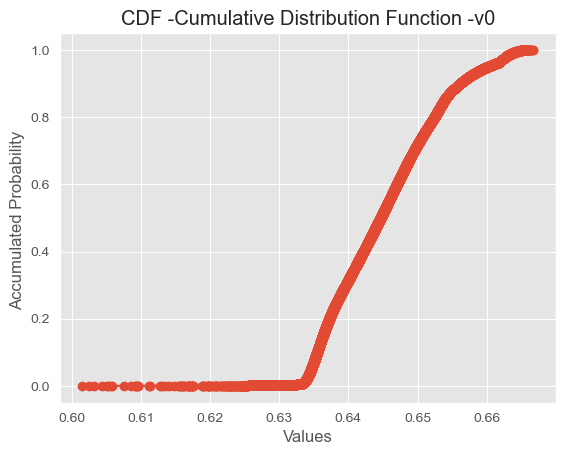

In [979]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Values')
plt.ylabel('Accumulated Probability ')
plt.title('CDF -Cumulative Distribution Function -v0')
plt.grid(True)
plt.savefig("CDF")
plt.show()




0    0.027678
dtype: float64


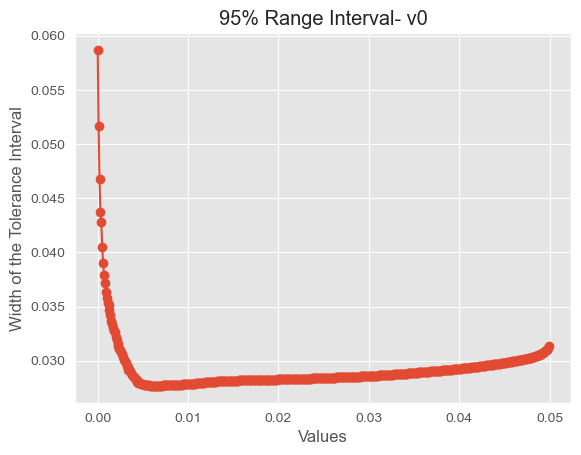

In [980]:
minvalue_IT0 = res.min()
print(minvalue_IT0)
plt.plot(x, res, marker='o')
plt.xlabel('Values')
plt.ylabel('Width of the Tolerance Interval')
plt.title('95% Range Interval- v0')
plt.grid(True)
plt.savefig("IT",format='pdf')
plt.show()

In [981]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

from scipy.interpolate import interp1d
inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_0= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_0= inverse_cdf(percentile2)

print(ymin_0)
print(ymax_0)


0.6332371830940247
0.660915195941925


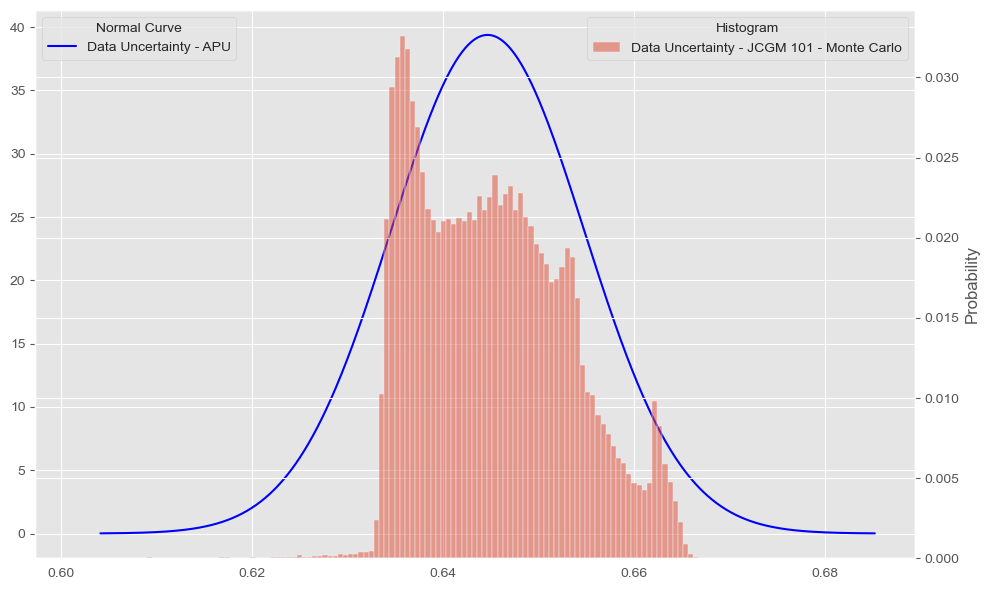

In [982]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd

# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout

# Salvando o gráfico em um arquivo PDF
fig.savefig('overlay_normal_curve_histogram1.pdf')

plt.show()


# simulation mc  v1 

In [984]:
i=1
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC1=np.std(previsão)
MMC1=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 544us/step


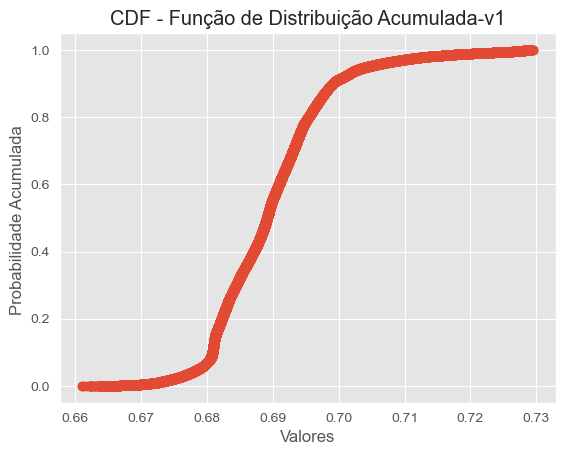

0    0.034157
dtype: float64


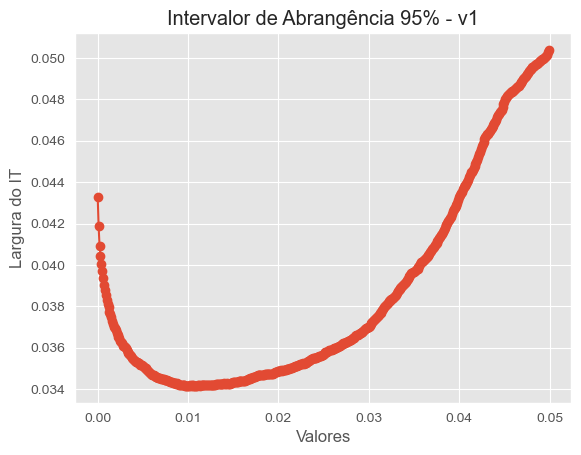

In [985]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v1')
plt.grid(True)
plt.show()

minvalue_IT1 = res.min()
print(minvalue_IT1)


plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v1')
plt.grid(True)
plt.show()

In [987]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_1= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_1= inverse_cdf(percentile2)

print(ymin_1)
print(ymax_1)


0.6724463105201721
0.7066034078598022


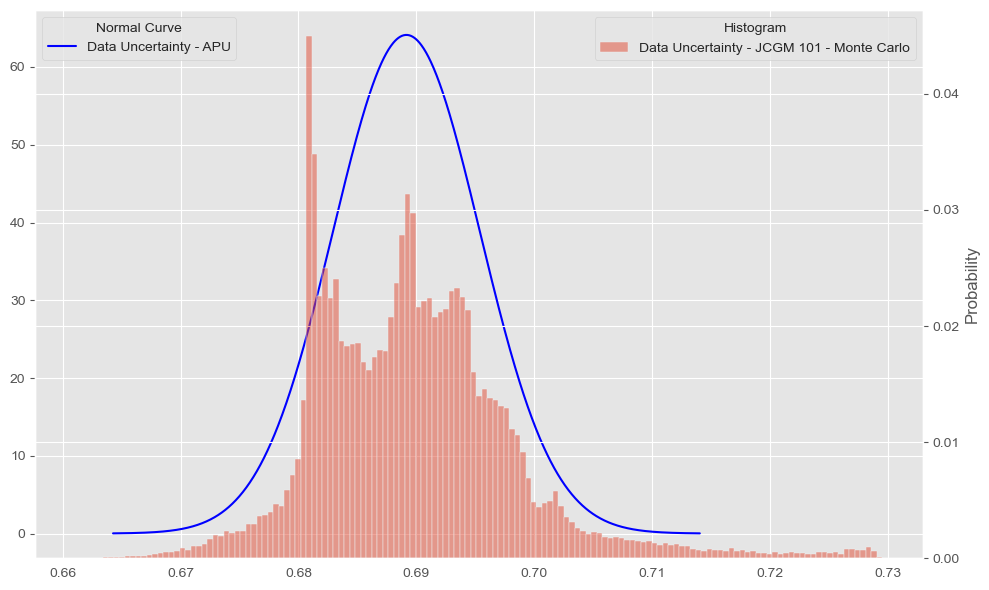

In [988]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd

# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
fig.savefig('overlay_normal_curve_histogram2.pdf')
plt.show()


# simulation  mc v2 

In [990]:
i=2
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC2=np.std(previsão)
MMC2=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 547us/step


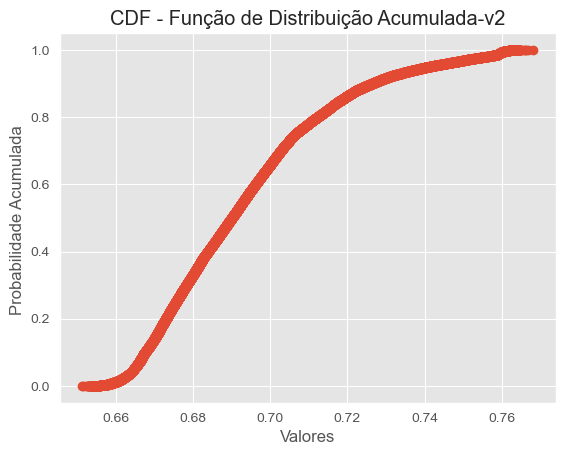

0    0.08526
dtype: float64


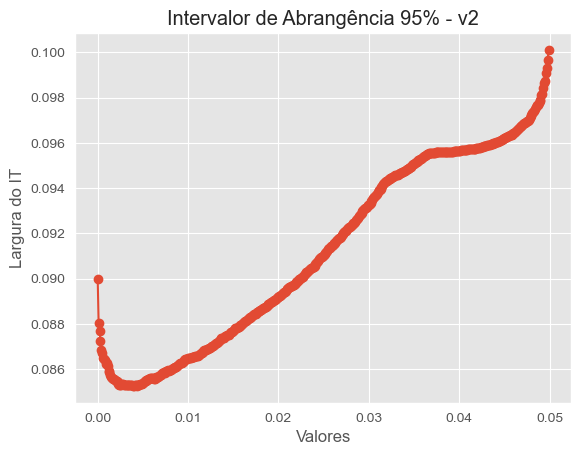

In [991]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v2')
plt.grid(True)
plt.show()

minvalue_IT2 = res.min()
print(minvalue_IT2)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v2')
plt.grid(True)
plt.show()

In [992]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_2= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_2= inverse_cdf(percentile2)

print(ymin_2)
print(ymax_2)


0.6576766967773438
0.742936372756958


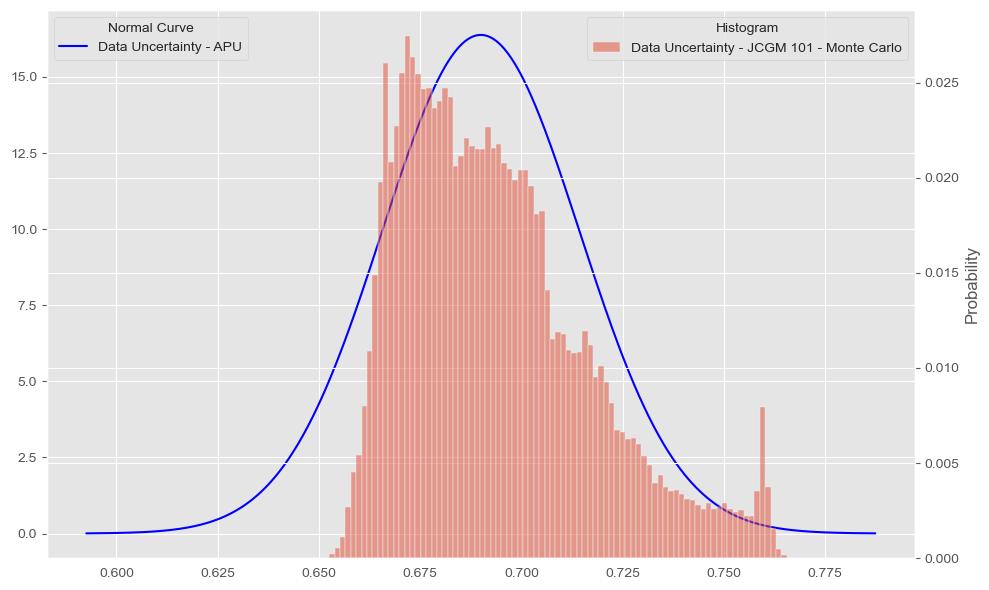

In [994]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
fig.savefig('overlay_normal_curve_histogram3.pdf')
plt.show()


# simulation  mc v3 

In [996]:
i=3
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC3=np.std(previsão)
MMC3=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 518us/step


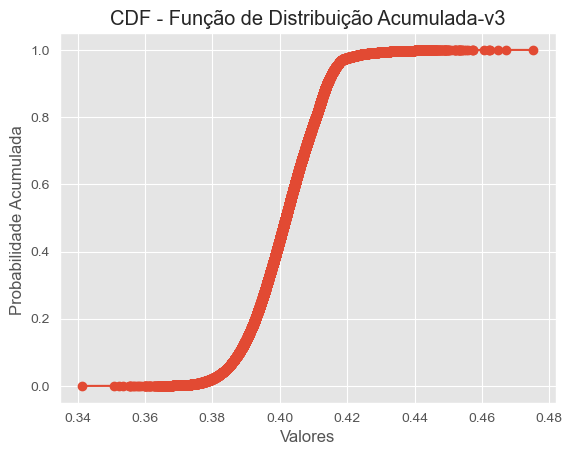

0    0.038663
dtype: float64


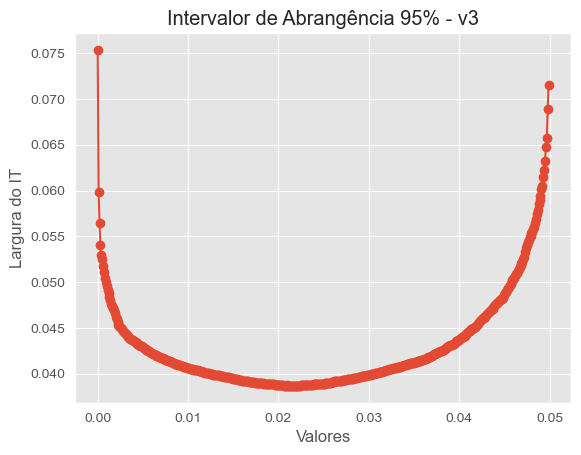

In [997]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v3')
plt.grid(True)
plt.show()

minvalue_IT3 = res.min()
print(minvalue_IT3)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v3')
plt.grid(True)
plt.show()

In [998]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_3= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_3= inverse_cdf(percentile2)

print(ymin_3)
print(ymax_3)


0.38006389141082764
0.4187353253364563


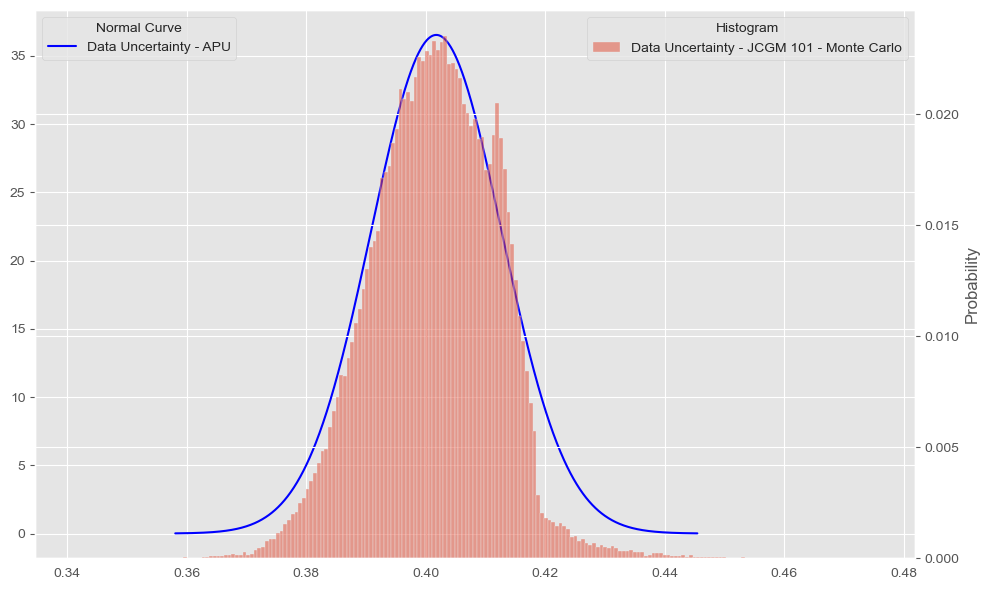

In [999]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
fig.savefig('overlay_normal_curve_histogram4.pdf')
plt.show()


# simulation  mc v4

In [1003]:
i=4
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC4=np.std(previsão)
MMC4=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 531us/step


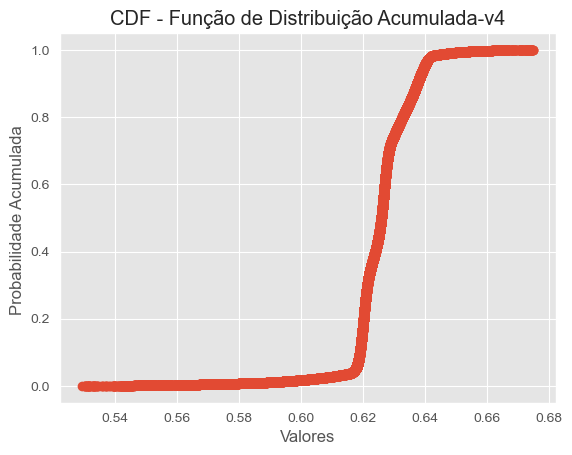

0    0.028805
dtype: float64


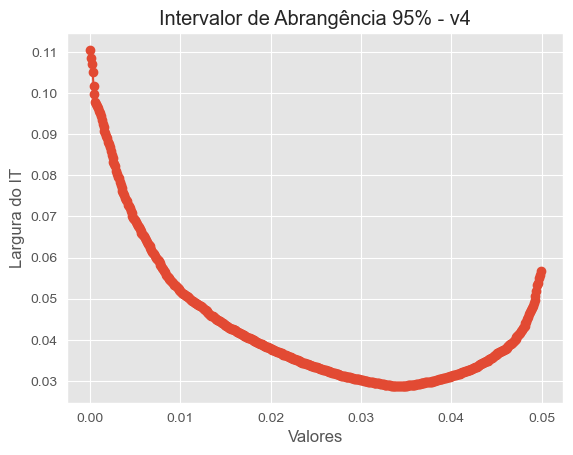

In [1004]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v4')
plt.grid(True)
plt.show()

minvalue_IT4 = res.min()
print(minvalue_IT4)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v4')
plt.grid(True)
plt.show()

In [1005]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_4= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_4= inverse_cdf(percentile2)

print(ymin_4)
print(ymax_4)


0.6146445870399475
0.6434493064880369


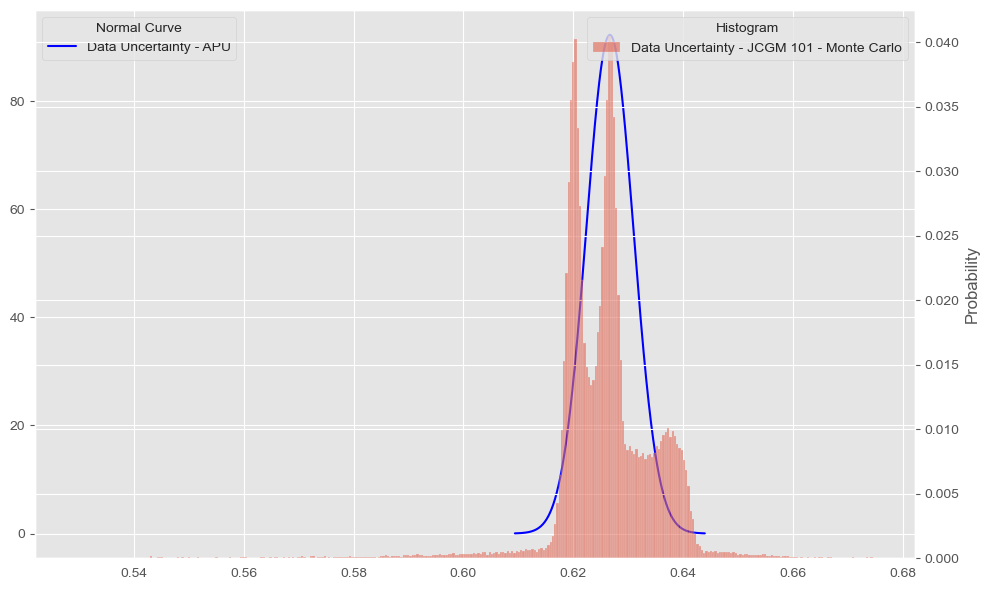

In [1006]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
fig.savefig('overlay_normal_curve_histogram5.pdf')
plt.show()


# simulation  mc v5 

In [1009]:
i=5
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC5=np.std(previsão)
MMC5=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 573us/step


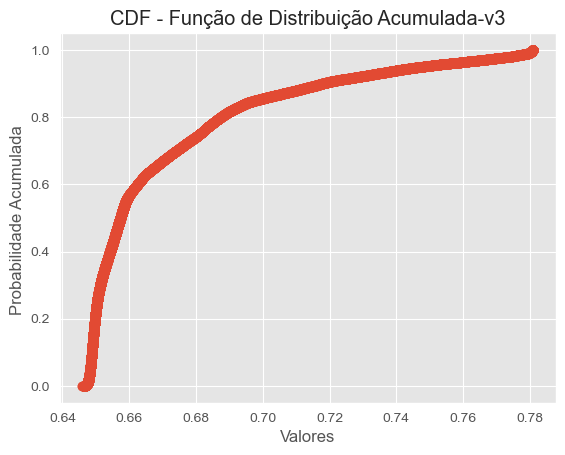

0    0.101401
dtype: float64


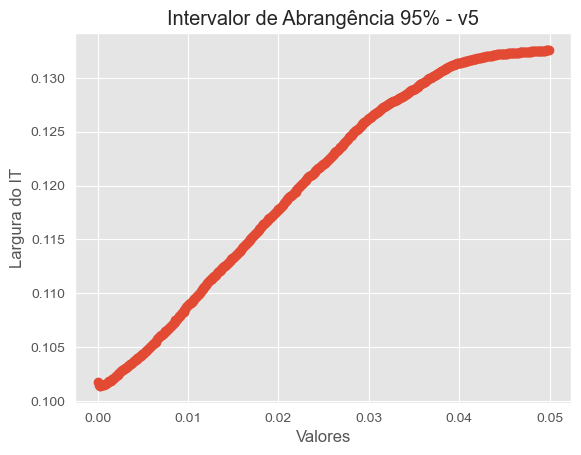

In [1010]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v3')
plt.grid(True)
plt.show()

minvalue_IT5 = res.min()
print(minvalue_IT5)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v5')
plt.grid(True)
plt.show()

In [1011]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_5= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_5= inverse_cdf(percentile2)

print(ymin_5)
print(ymax_5)

0.646452784538269
0.7478539943695068


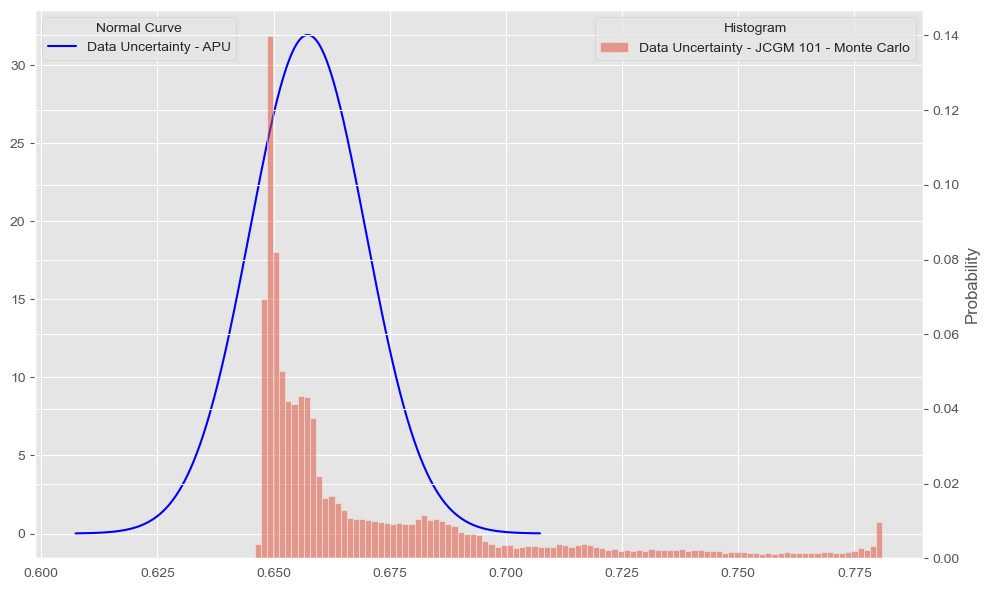

In [1012]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
fig.savefig('overlay_normal_curve_histogram6.pdf')
plt.show()


# simulation  mc v6 

In [1014]:
i=6
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC6=np.std(previsão)
MMC6=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 534us/step


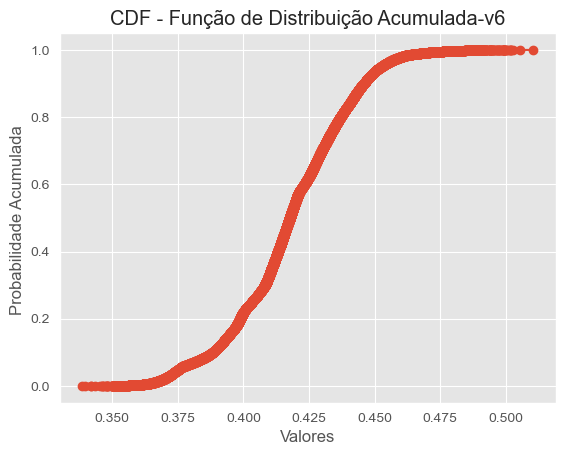

0    0.087583
dtype: float64


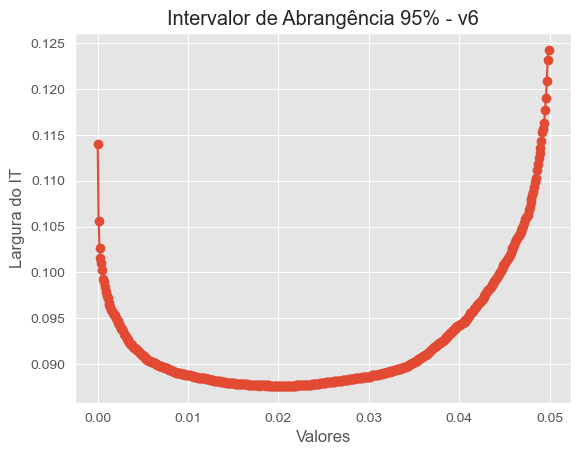

In [1015]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v6')
plt.grid(True)
plt.show()

minvalue_IT6 = res.min()
print(minvalue_IT6)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v6')
plt.grid(True)
plt.show()

In [1016]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_6= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_6= inverse_cdf(percentile2)
print(ymin_6)
print(ymax_6)

0.36969131231307983
0.4572746753692627


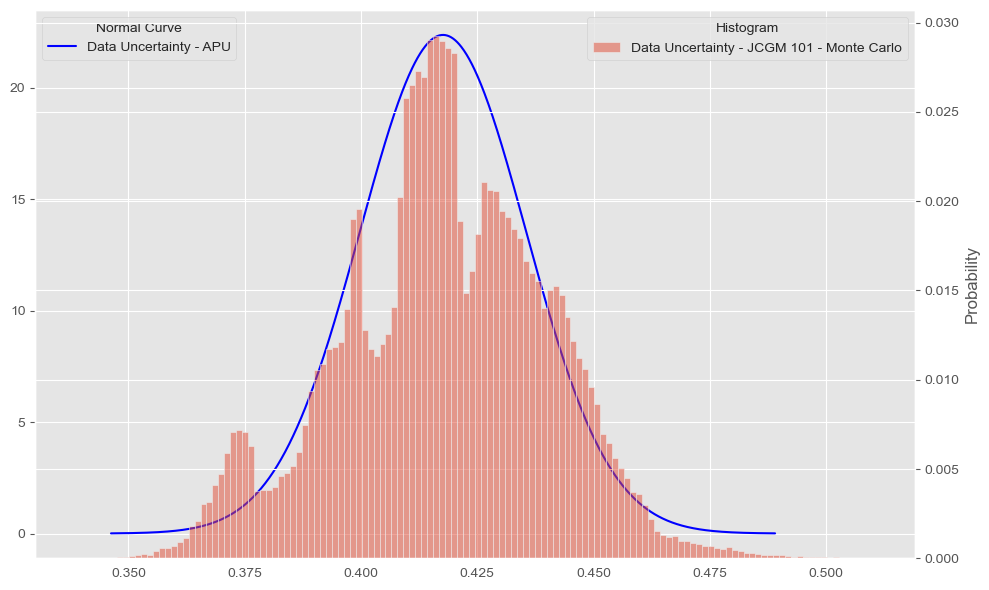

In [1017]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
fig.savefig('overlay_normal_curve_histogram7.pdf')
plt.show()


# simulação mc v7 

In [1019]:
i=7
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC7=np.std(previsão)
MMC7=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 538us/step


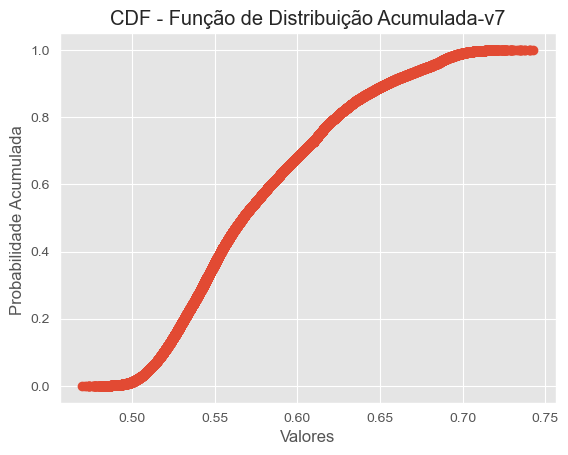

0    0.185013
dtype: float64


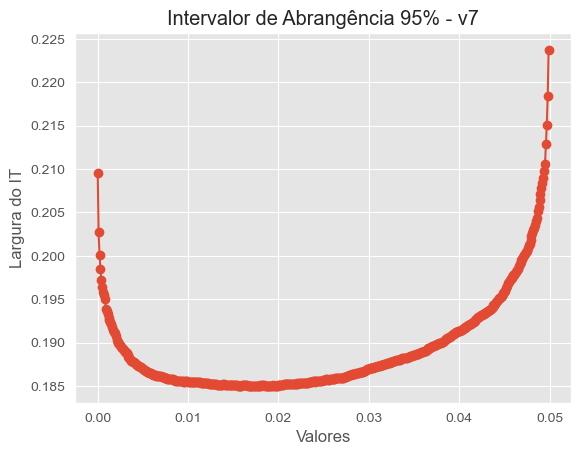

In [1021]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v7')
plt.grid(True)
plt.show()

minvalue_IT7 = res.min()
print(minvalue_IT7)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v7')
plt.grid(True)
plt.show()

In [1022]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_7= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_7= inverse_cdf(percentile2)
print(ymin_7)
print(ymax_7)

0.5021995902061462
0.6872128248214722


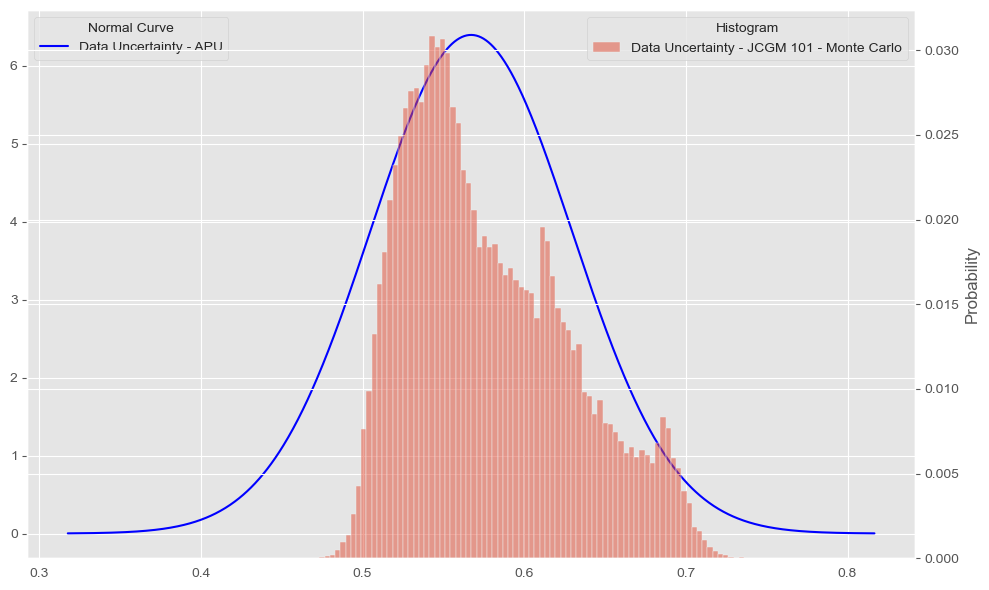

In [1023]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
fig.savefig('overlay_normal_curve_histogram8.pdf')
plt.show()


# simulação mc v8 

In [1026]:
i=8
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC8=np.std(previsão)
MMC8=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 526us/step


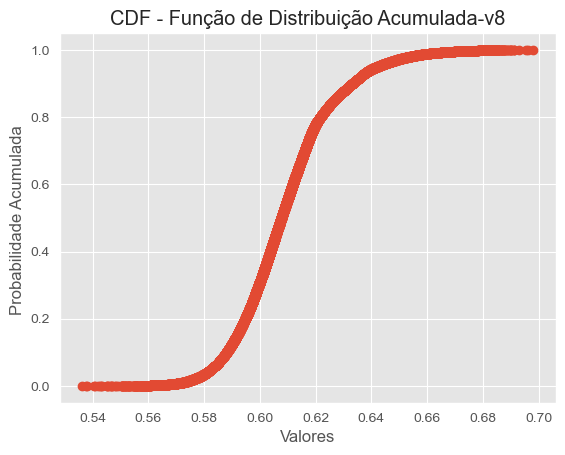

0    0.072462
dtype: float64


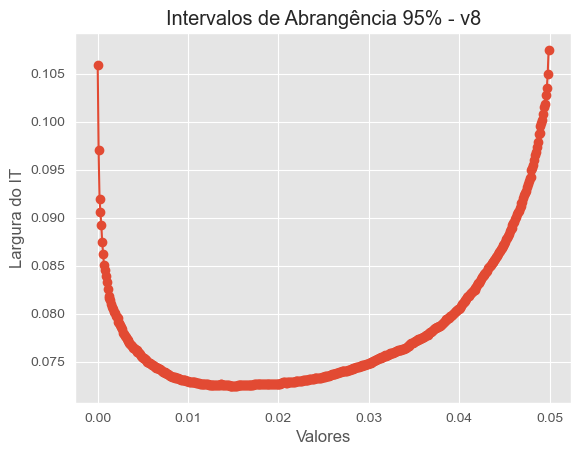

In [1027]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v8')
plt.grid(True)
plt.show()

minvalue_IT8 = res.min()
print(minvalue_IT8)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v8')
plt.grid(True)
plt.show()

In [1028]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_8= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_8= inverse_cdf(percentile2)
print(ymin_8)
print(ymax_8)

0.5745266675949097
0.6469888687133789


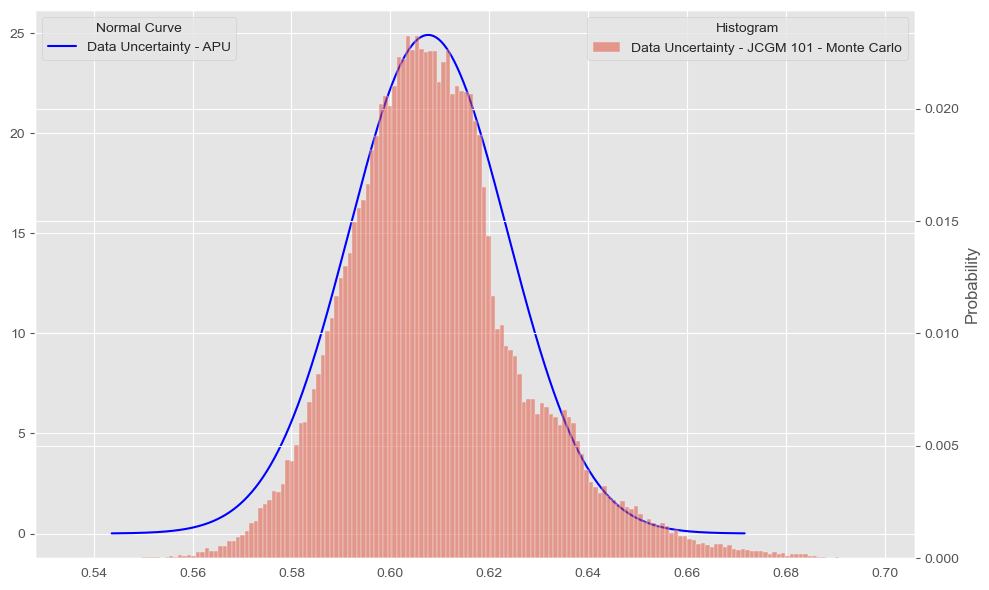

In [1029]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
fig.savefig('overlay_normal_curve_histogram9.pdf')
plt.show()


# simulação mc v9

In [1032]:
i=9
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC9=np.std(previsão)
MMC9=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 526us/step


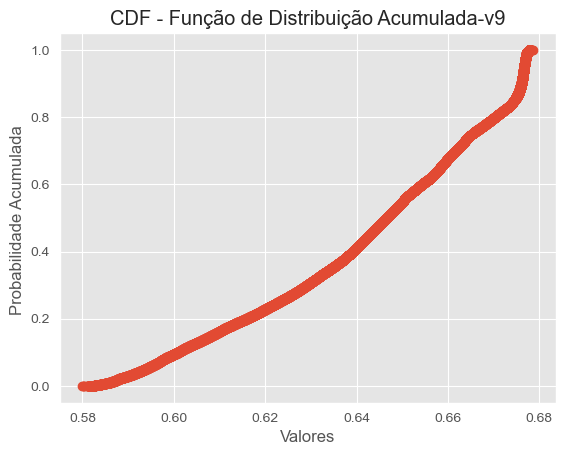

0    0.084075
dtype: float64


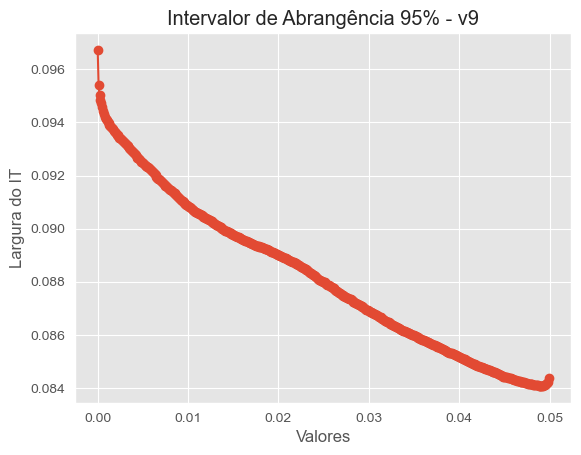

In [1033]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v9')
plt.grid(True)
plt.show()

minvalue_IT9 = res.min()
print(minvalue_IT9)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v9')
plt.grid(True)
plt.show()

In [1034]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_9= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_9= inverse_cdf(percentile2)
print(ymin_9)
print(ymax_9)

0.593662440776825
0.6777382493019104


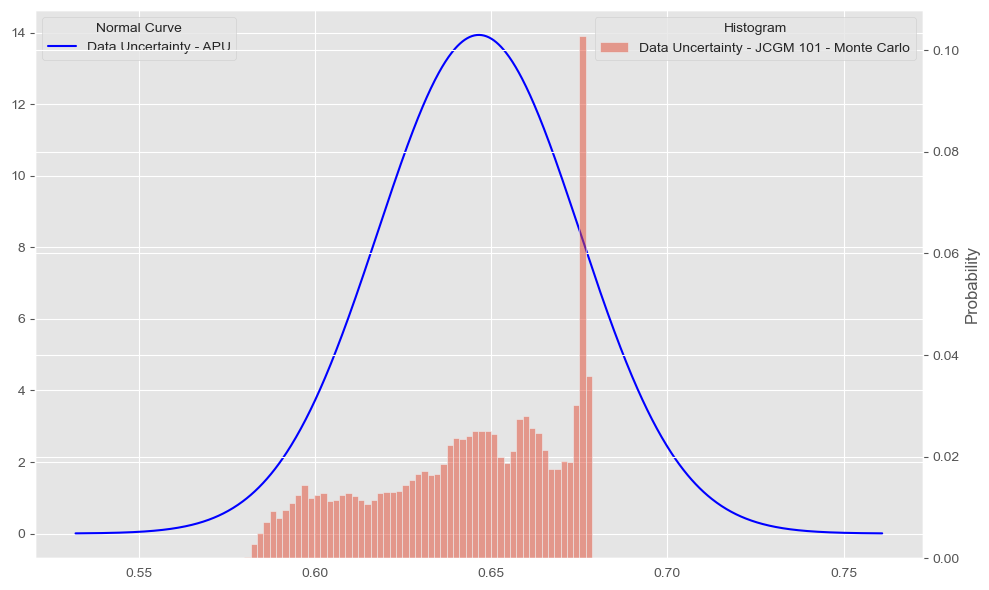

In [1036]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
fig.savefig('overlay_normal_curve_histogram10.pdf')
plt.show()


# simulação mc v10 

In [1038]:
i=10
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC10=np.std(previsão)
MMC10=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 579us/step


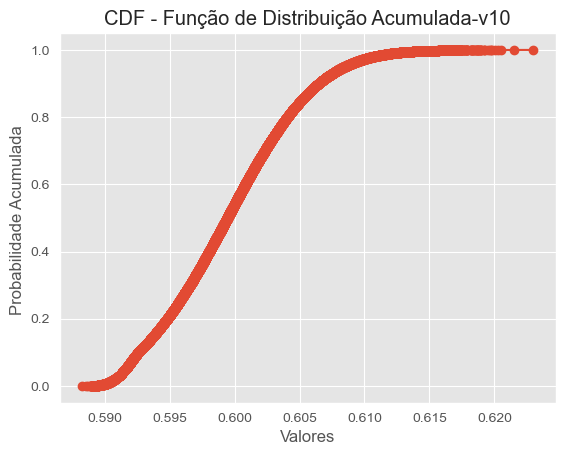

0    0.01873
dtype: float64


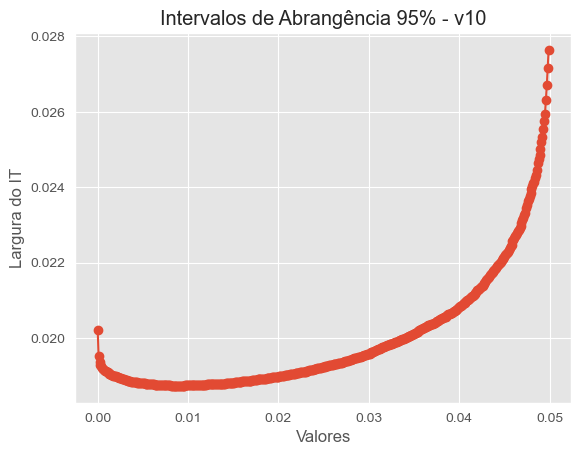

In [1039]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v10')
plt.grid(True)
plt.show()

minvalue_IT10 = res.min()
print(minvalue_IT10)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v10')
plt.grid(True)
plt.show()

In [1041]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_10= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_10= inverse_cdf(percentile2)
print(ymin_10)
print(ymax_10)

0.5902302861213684
0.6089600920677185


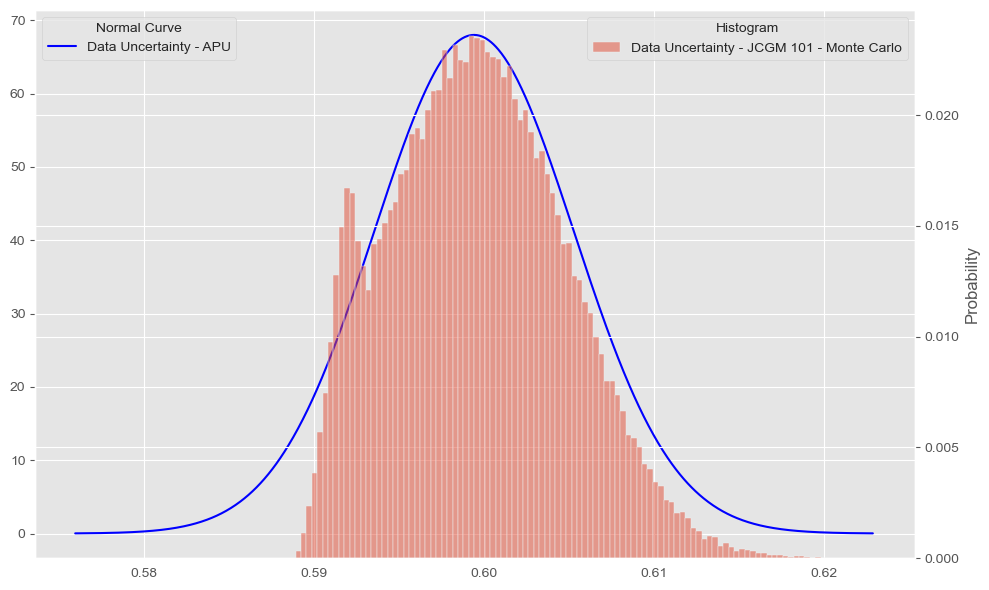

In [1042]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
fig.savefig('overlay_normal_curve_histogram11.pdf')
plt.show()


# simulação mc v11 

In [1079]:
i=11
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC11=np.std(previsão)
MMC11=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 546us/step


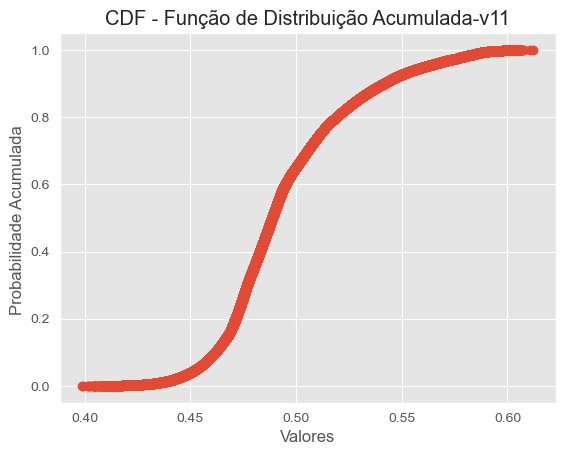

0    0.12961
dtype: float64


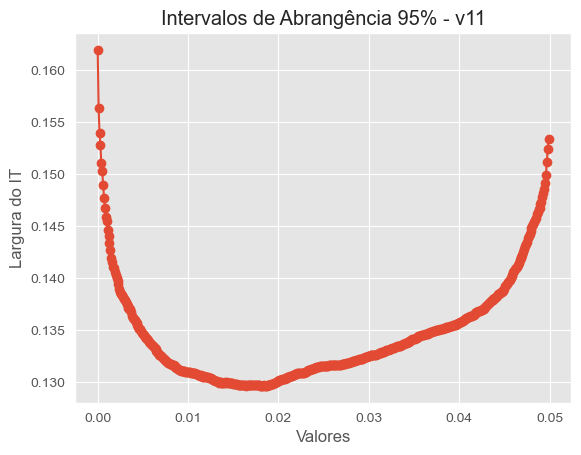

In [1080]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v11')
plt.grid(True)
plt.show()

minvalue_IT11 = res.min()
print(minvalue_IT11)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v11')
plt.grid(True)
plt.show()

In [1081]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_11= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_11= inverse_cdf(percentile2)
print(ymin_11)
print(ymax_11)

0.44158393144607544
0.5711934566497803


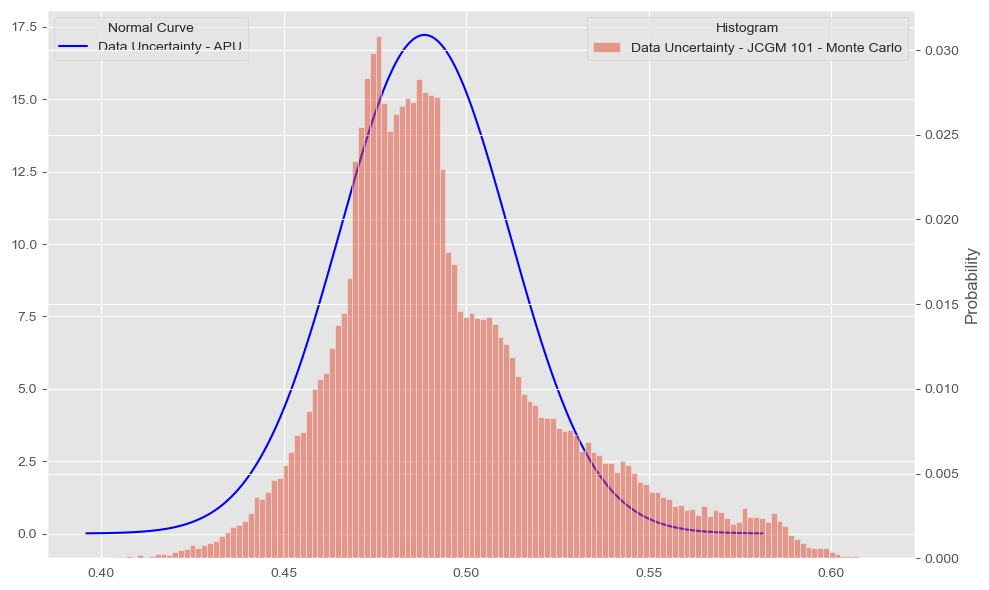

In [1082]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
plt.show()


# simulação mc v12 

In [1088]:
i=12
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC12=np.std(previsão)
MMC12=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 578us/step


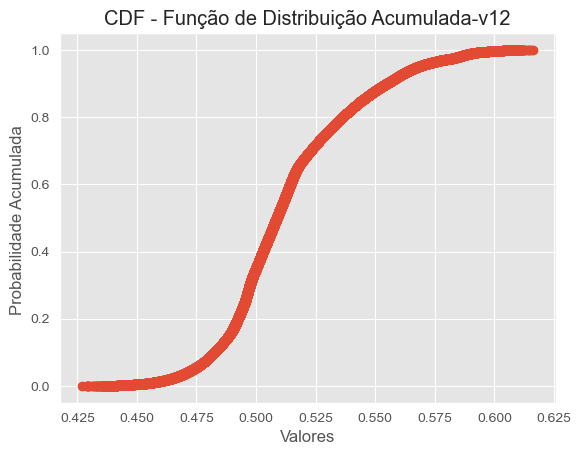

0    0.114625
dtype: float64


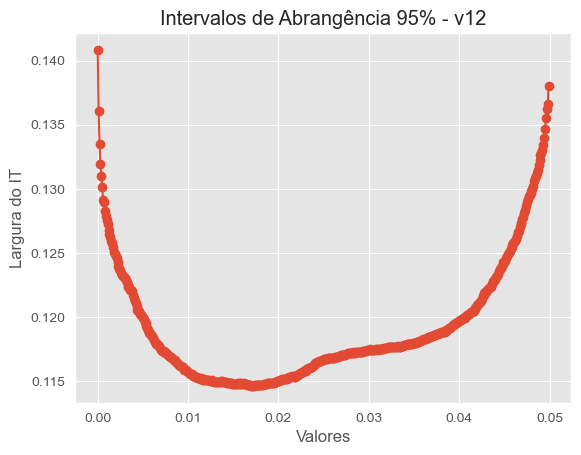

In [1089]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v12')
plt.grid(True)
plt.show()

minvalue_IT12 = res.min()
print(minvalue_IT12)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v12')
plt.grid(True)
plt.show()

In [1090]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_12= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_12= inverse_cdf(percentile2)
print(ymin_12)
print(ymax_12)

0.461825966835022
0.5764504671096802


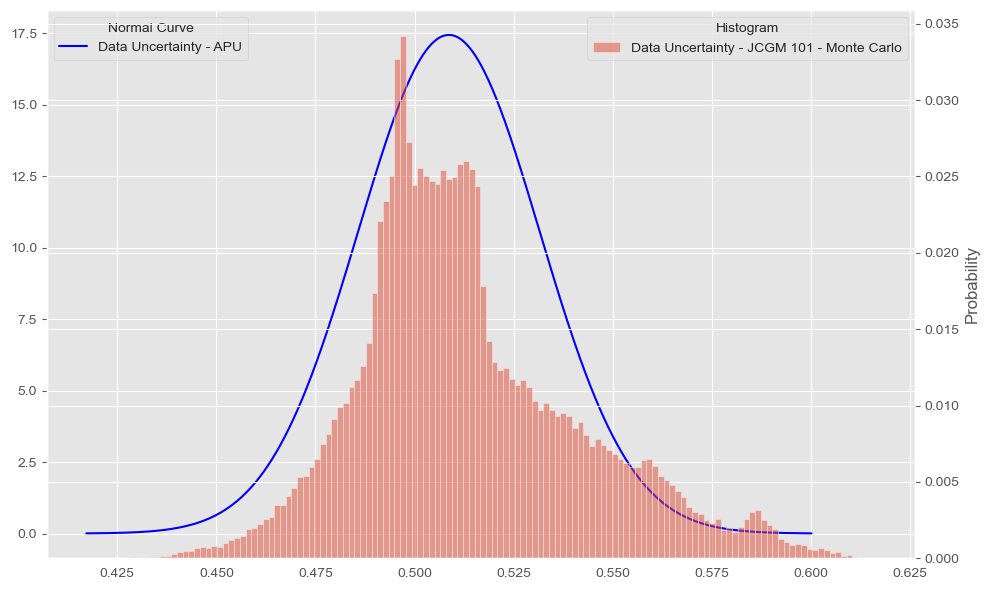

In [1091]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
plt.show()


# simulação mc v13 

In [1268]:
i=13
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC13=np.std(previsão)
MMC13=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 586us/step


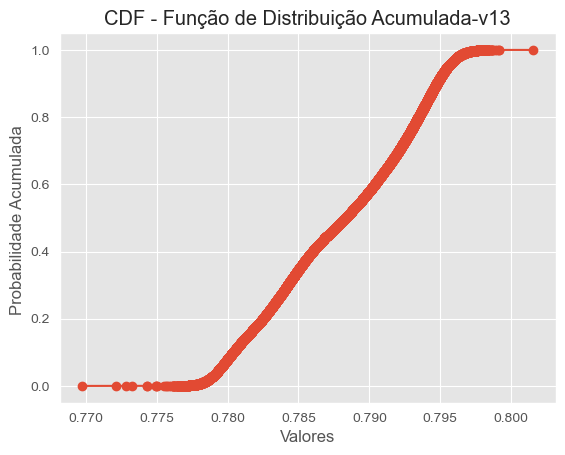

0    0.017258
dtype: float64


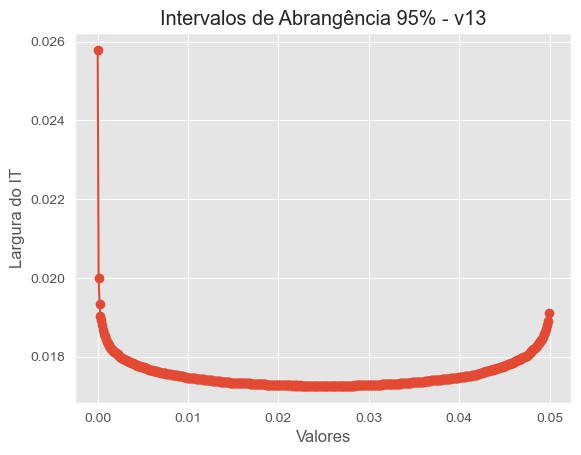

In [1269]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v13')
plt.grid(True)
plt.show()

minvalue_IT13 = res.min()
print(minvalue_IT13)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v13')
plt.grid(True)
plt.show()

In [1270]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_13= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_13= inverse_cdf(percentile2)
print(ymin_13)
print(ymax_13)

0.7788490056991577
0.7961068749427795


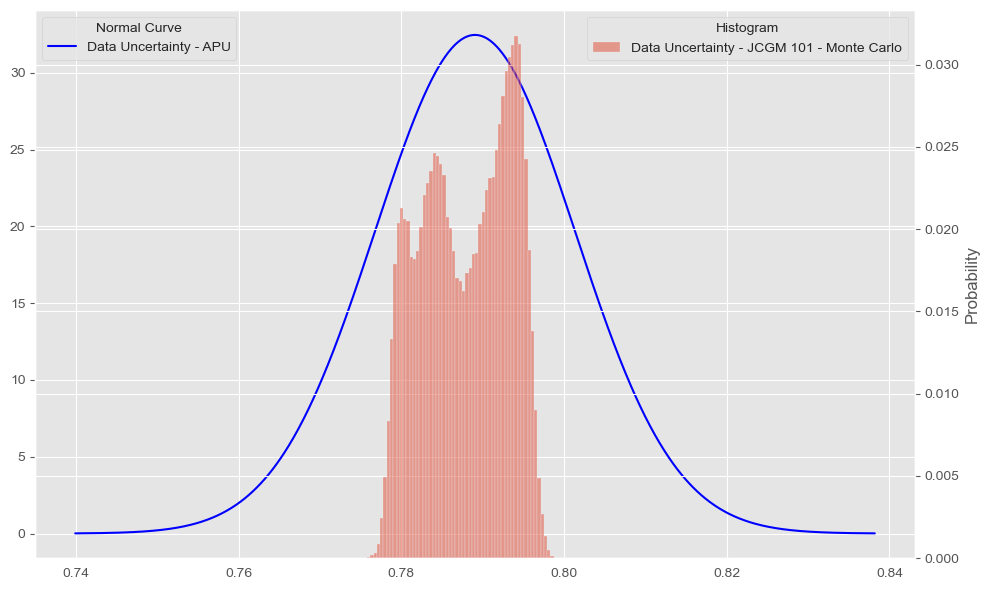

In [1272]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
fig.savefig('overlay_normal_curve_histogramruim1.pdf')
plt.show()


# simulação mc v14 

In [1106]:
i=14
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC14=np.std(previsão)
MMC14=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 513us/step


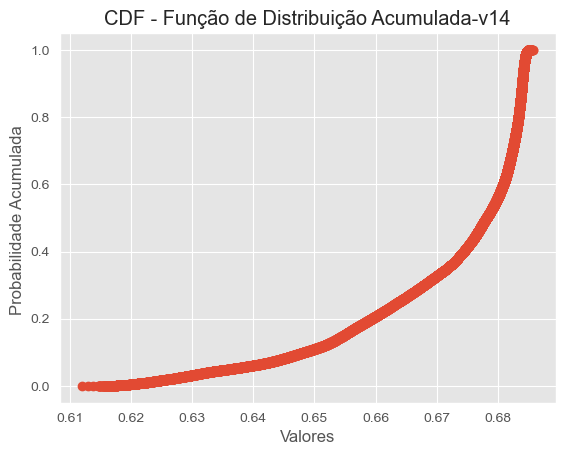

0    0.049141
dtype: float64


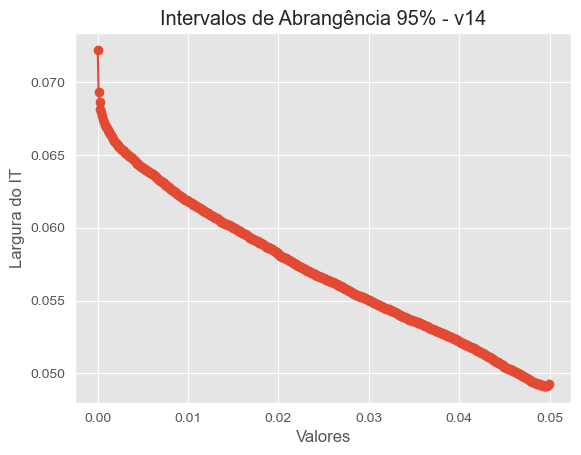

In [1107]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v14')
plt.grid(True)
plt.show()

minvalue_IT14 = res.min()
print(minvalue_IT14)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v14')
plt.grid(True)
plt.show()

In [1110]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_14= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_14= inverse_cdf(percentile2)
print(ymin_14)
print(ymax_14)

0.6360255479812622
0.6851754188537598


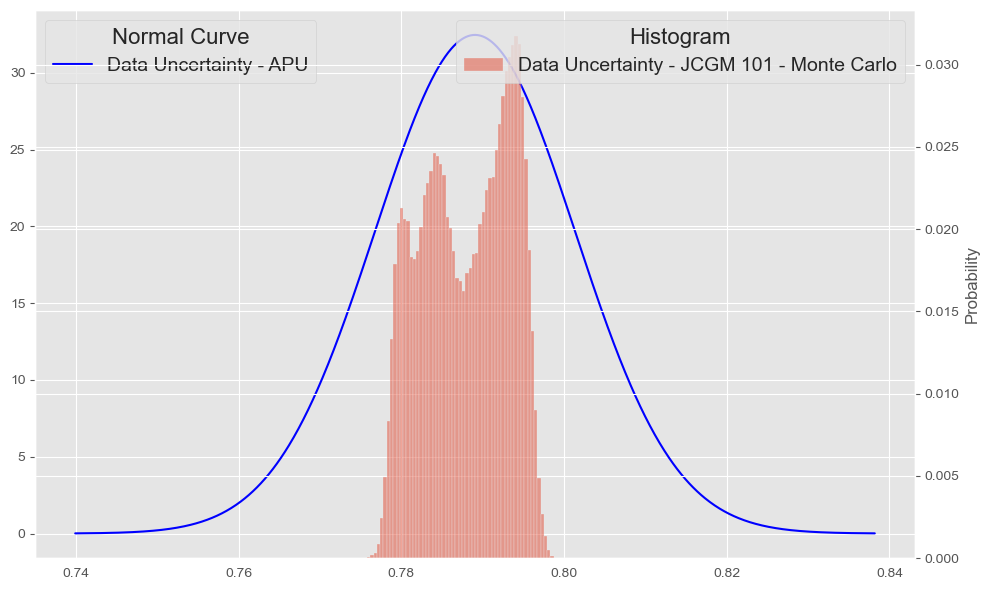

In [1286]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve',fontsize=14, title_fontsize=16)
ax2.legend(loc='upper right', title='Histogram',fontsize=14, title_fontsize=16)


fig.tight_layout()  # Para ajustar layout
plt.show()


# simulação mc v15 

In [1115]:
i=15
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC15=np.std(previsão)
MMC15=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 536us/step


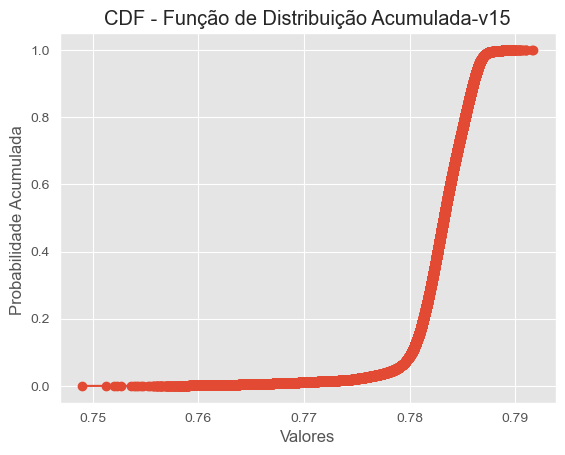

0    0.009357
dtype: float64


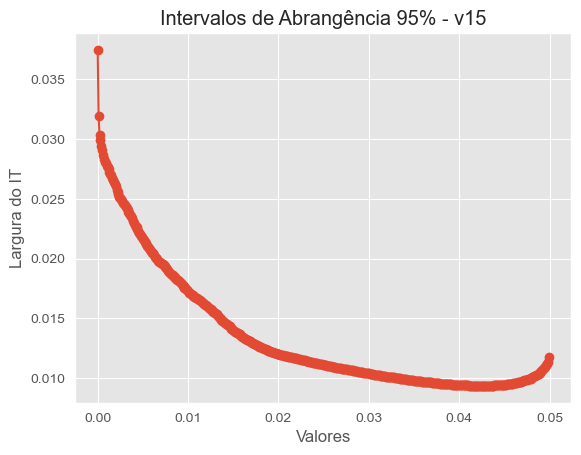

In [1116]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v15')
plt.grid(True)
plt.show()

minvalue_IT15 = res.min()
print(minvalue_IT15)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v15')
plt.grid(True)
plt.show()

In [1117]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_15= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_15= inverse_cdf(percentile2)
print(ymin_15)
print(ymax_15)

0.778129518032074
0.7874864935874939


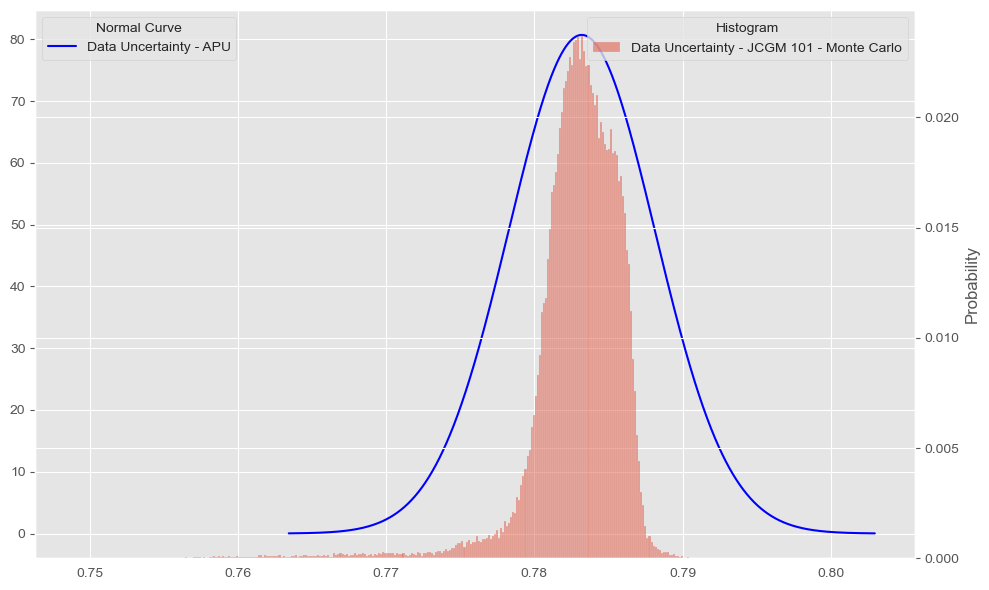

In [1118]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
plt.show()


# simulação mc v16 

In [1124]:
i=16
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC16=np.std(previsão)
MMC16=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 528us/step


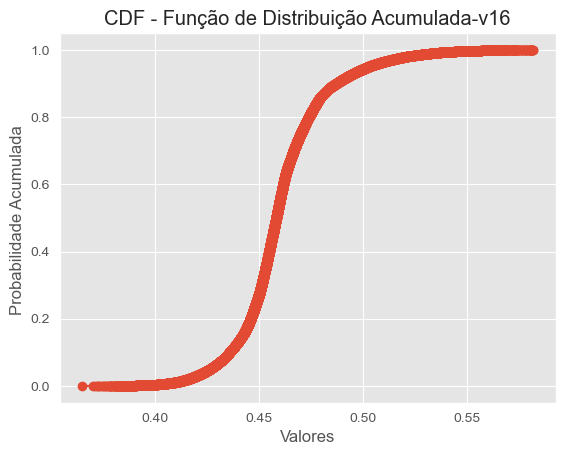

0    0.097089
dtype: float64


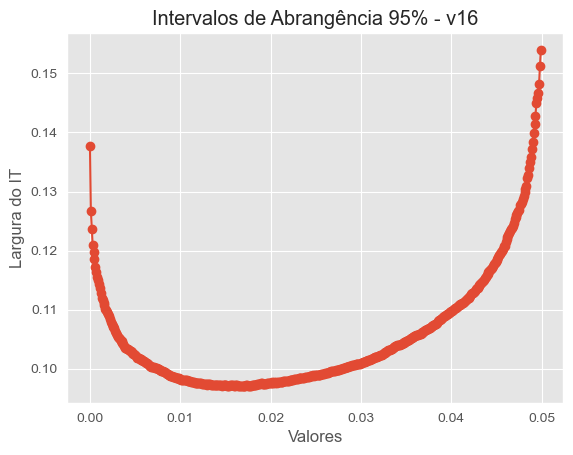

In [1125]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v16')
plt.grid(True)
plt.show()

minvalue_IT16 = res.min()
print(minvalue_IT16)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v16')
plt.grid(True)
plt.show()

In [1126]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_16= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_16= inverse_cdf(percentile2)
print(ymin_16)
print(ymax_16)

0.4141295552253723
0.511218249797821


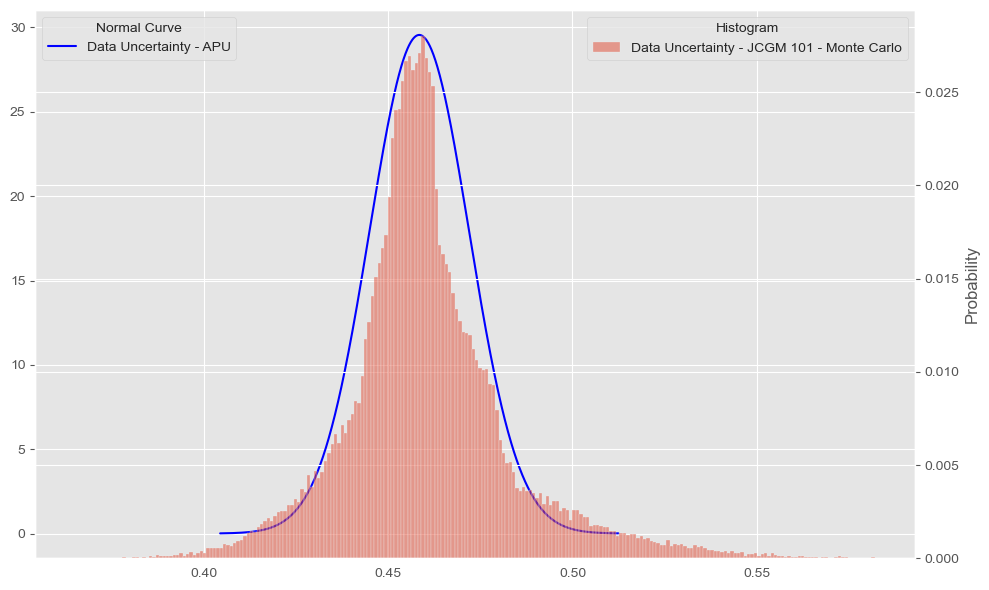

In [1127]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
plt.show()


# simulação mc v17 

In [1129]:
i=17
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC17=np.std(previsão)
MMC17=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 527us/step


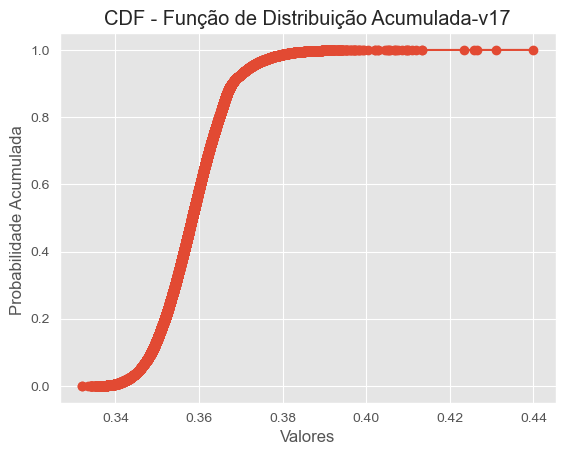

0    0.032412
dtype: float64


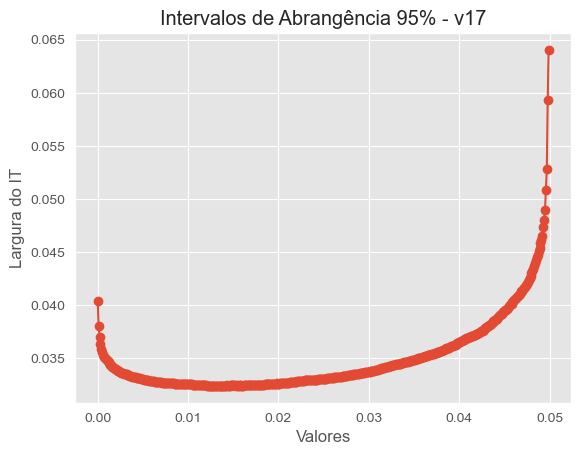

In [1130]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v17')
plt.grid(True)
plt.show()

minvalue_IT17 = res.min()
print(minvalue_IT17)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v17')
plt.grid(True)
plt.show()

In [1131]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_17= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_17= inverse_cdf(percentile2)
print(ymin_17)
print(ymax_17)

0.3418899178504944
0.37430188059806824


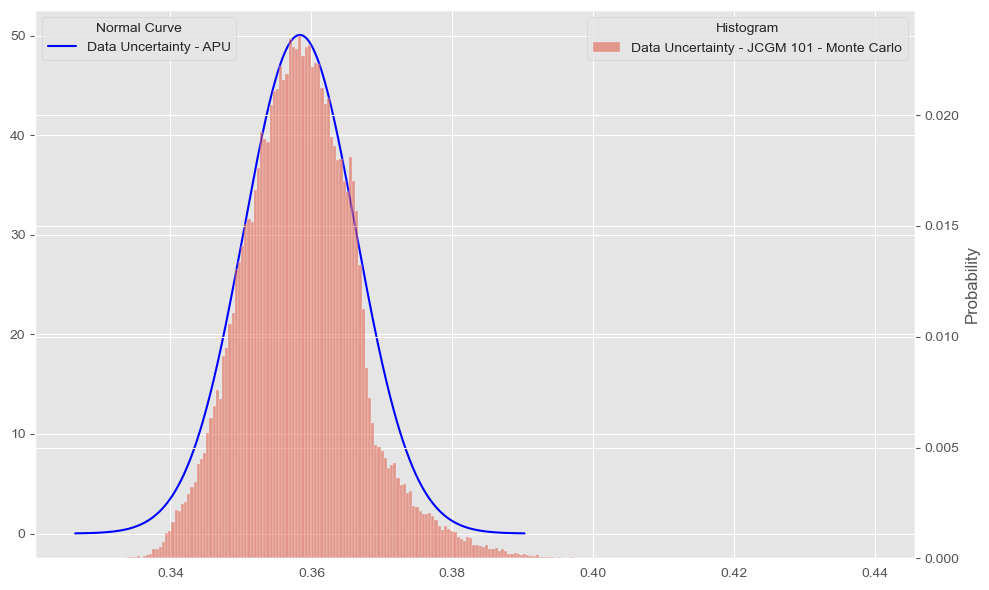

In [1132]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
plt.show()


# simulação mc v18 

In [1134]:
i=18
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC18=np.std(previsão)
MMC18=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 529us/step


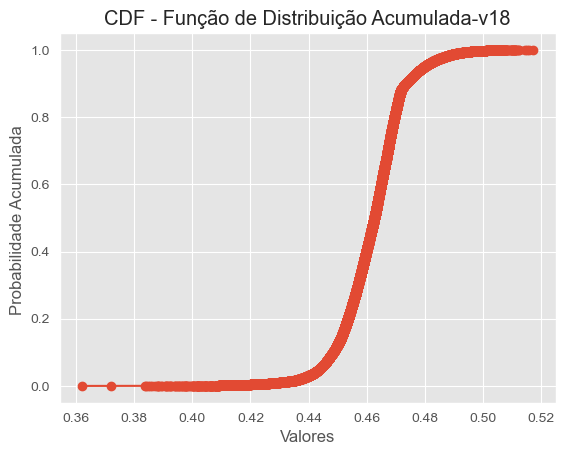

0    0.046748
dtype: float64


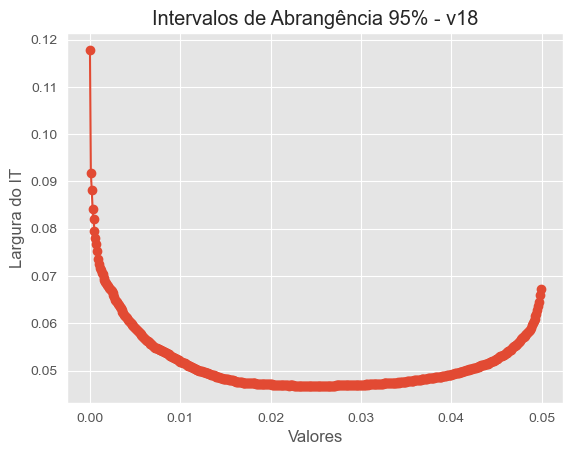

In [1135]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v18')
plt.grid(True)
plt.show()

minvalue_IT18 = res.min()
print(minvalue_IT18)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v18')
plt.grid(True)
plt.show()

In [1136]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_18= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_18= inverse_cdf(percentile2)
print(ymin_18)
print(ymax_18)

0.43875396251678467
0.48550206422805786


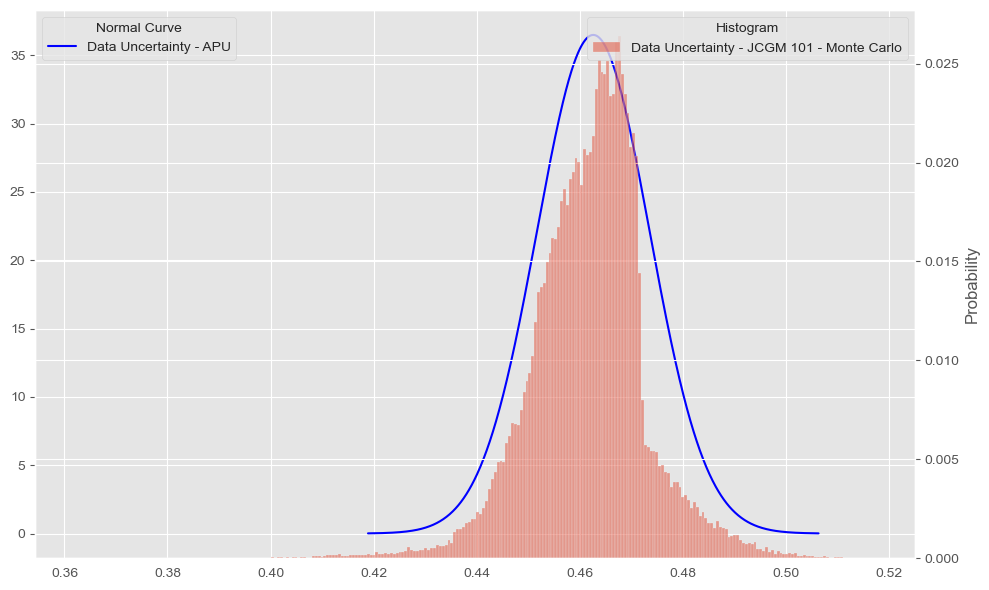

In [1137]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
plt.show()


# simulação mc v19 

In [1139]:
i=19
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC19=np.std(previsão)
MMC19=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 519us/step


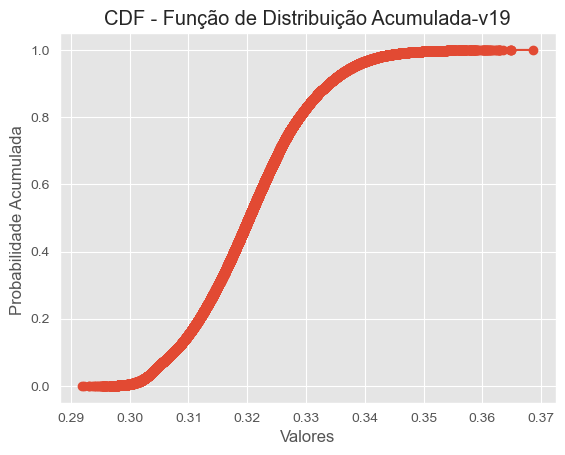

0    0.03807
dtype: float64


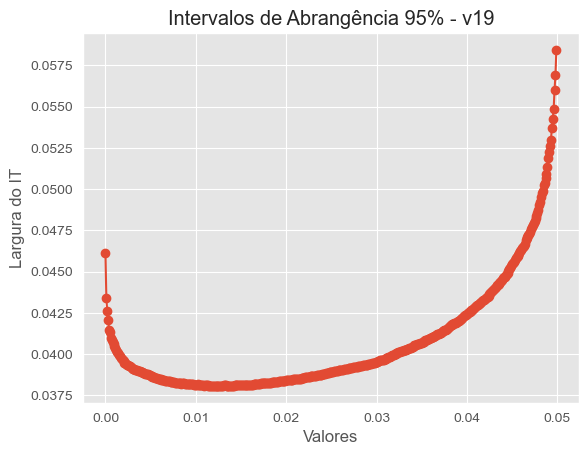

In [1140]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v19')
plt.grid(True)
plt.show()

minvalue_IT19 = res.min()
print(minvalue_IT19)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v19')
plt.grid(True)
plt.show()

In [1141]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_19= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_19= inverse_cdf(percentile2)
print(ymin_19)
print(ymax_19)

0.3014639616012573
0.3395359516143798


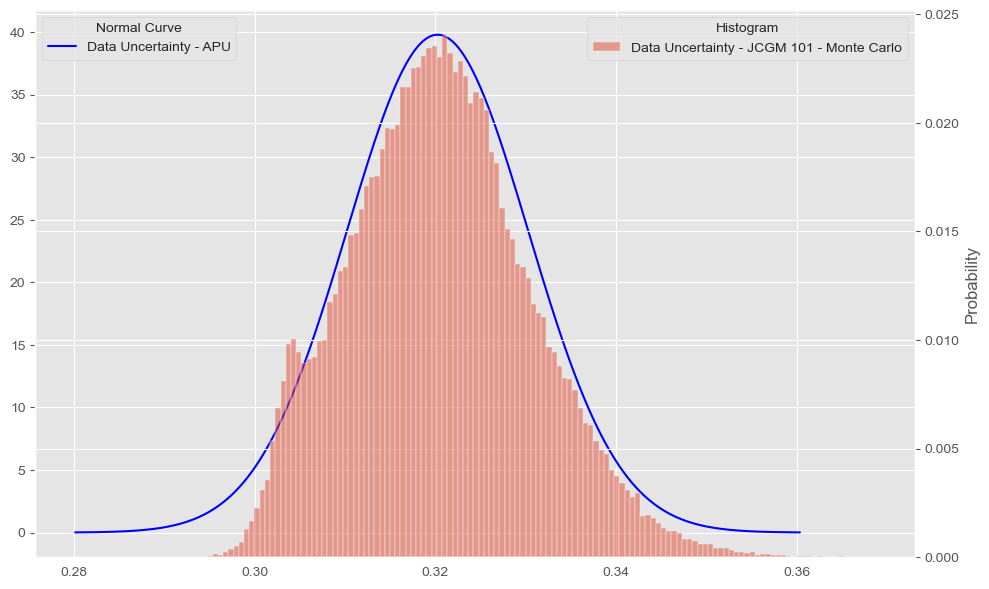

In [1143]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
plt.show()


# simulação mc v20 

In [1145]:
i=20
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC20=np.std(previsão)
MMC20=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 520us/step


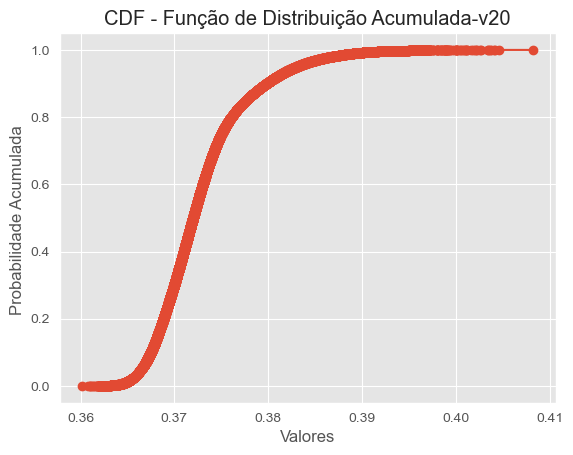

0    0.019167
dtype: float64


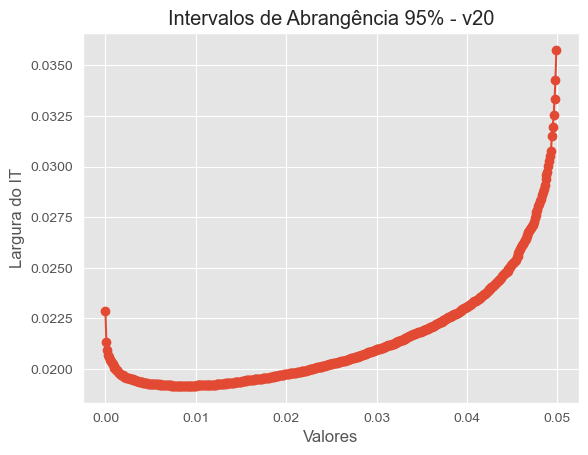

In [1147]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v20')
plt.grid(True)
plt.show()

minvalue_IT20 = res.min()
print(minvalue_IT20)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v20')
plt.grid(True)
plt.show()

In [1148]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_20= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_20= inverse_cdf(percentile2)
print(ymin_20)
print(ymax_20)

0.364582896232605
0.38375037908554077


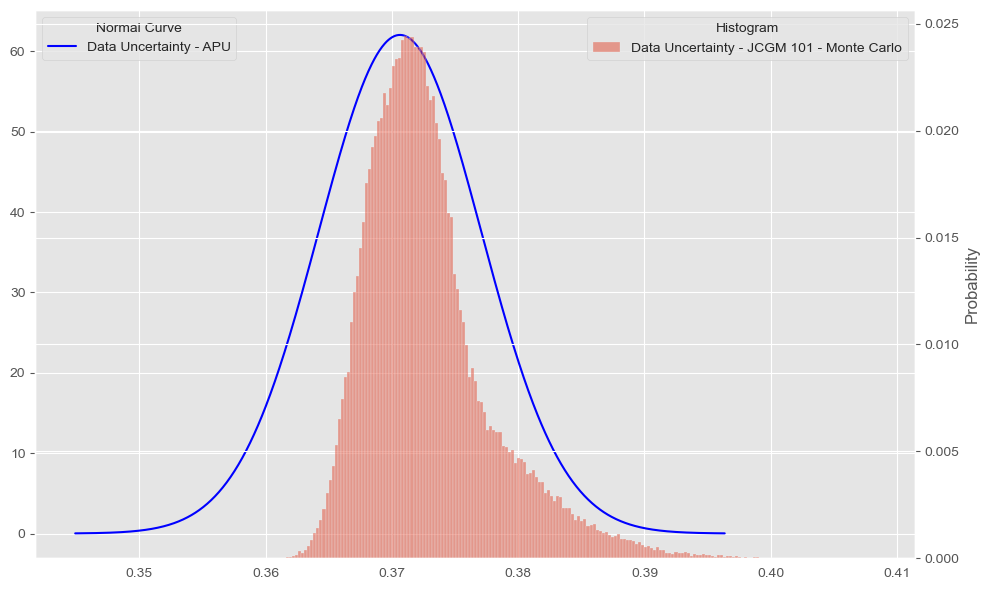

In [1149]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
plt.show()


# simulação mc v21 

In [1151]:
i=21
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC21=np.std(previsão)
MMC21=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 532us/step


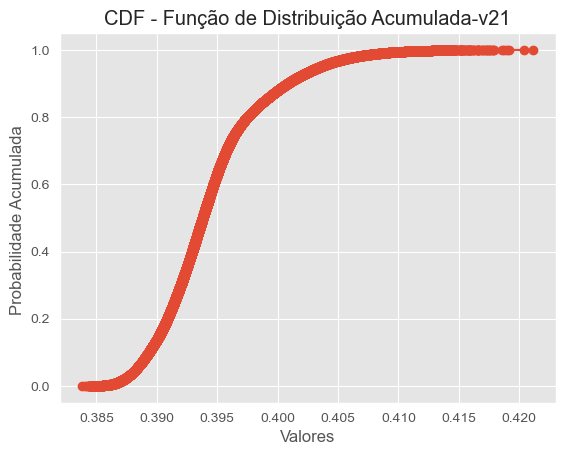

0    0.017533
dtype: float64


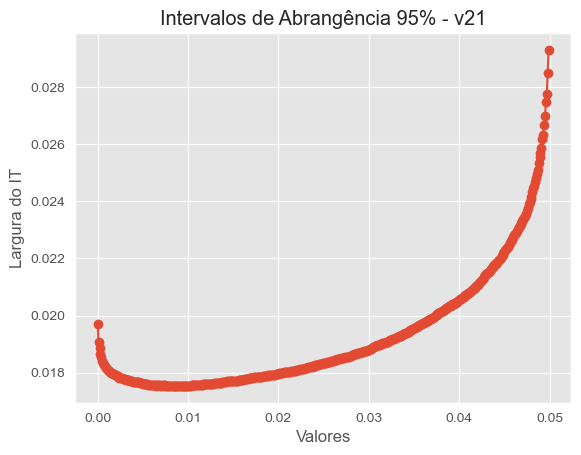

In [1153]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v21')
plt.grid(True)
plt.show()

minvalue_IT21 = res.min()
print(minvalue_IT21)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v21')
plt.grid(True)
plt.show()

In [1154]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_21= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_21= inverse_cdf(percentile2)
print(ymin_21)
print(ymax_21)

0.3867291510105133
0.40426215529441833


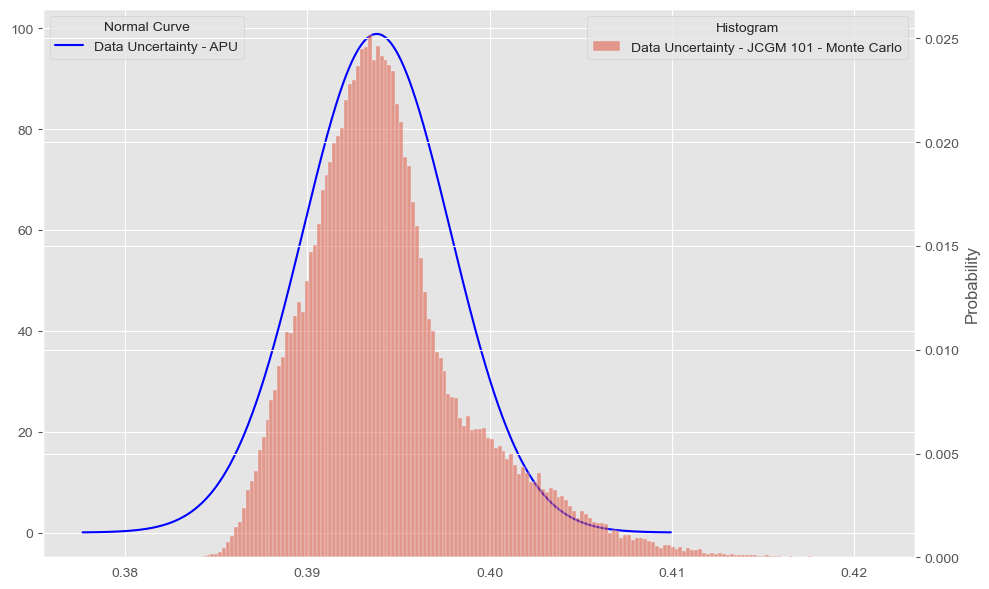

In [1155]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
plt.show()


# simulação mc v22 

In [1157]:
i=22
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC22=np.std(previsão)
MMC22=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 583us/step


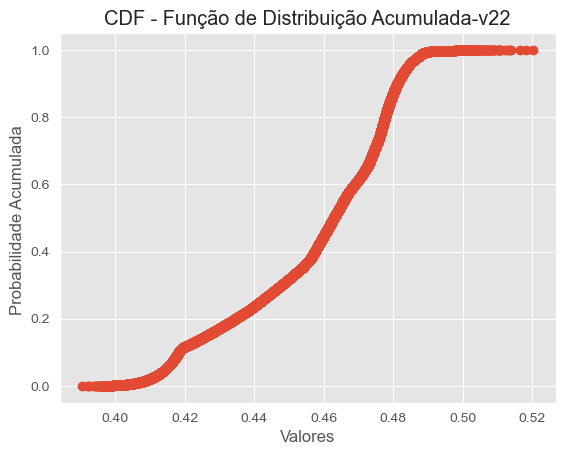

0    0.075125
dtype: float64


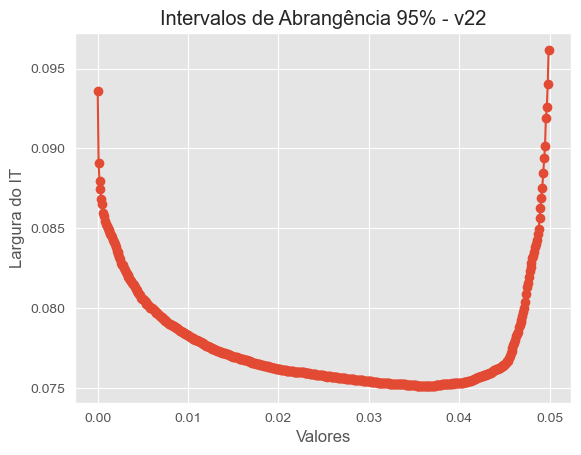

In [1159]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v22')
plt.grid(True)
plt.show()

minvalue_IT22 = res.min()
print(minvalue_IT22)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v22')
plt.grid(True)
plt.show()

In [1160]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_22= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_22= inverse_cdf(percentile2)
print(ymin_22)
print(ymax_22)

0.41289258003234863
0.48801717162132263


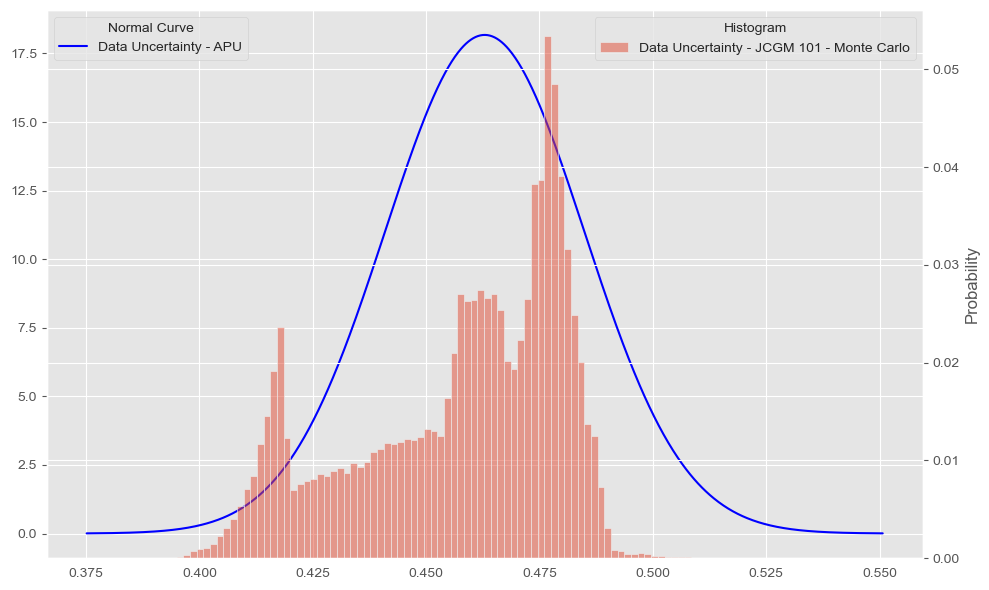

In [1161]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
plt.show()


# simulação mc v23

In [1163]:
i=23
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC23=np.std(previsão)
MMC23=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 541us/step


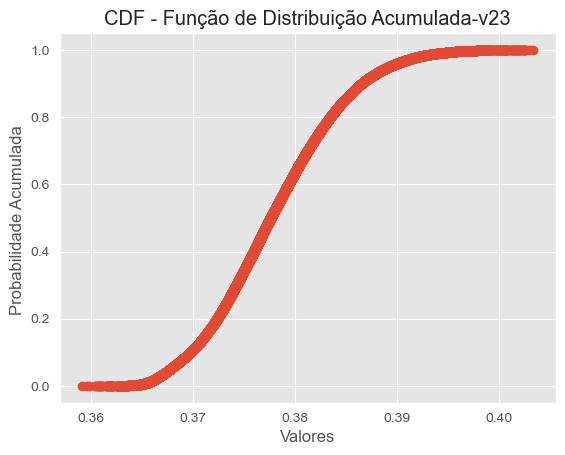

0    0.024477
dtype: float64


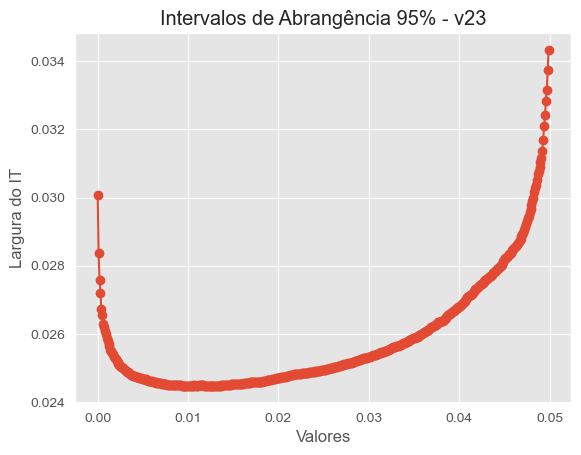

In [1164]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v23')
plt.grid(True)
plt.show()

minvalue_IT23 = res.min()
print(minvalue_IT23)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v23')
plt.grid(True)
plt.show()

In [1165]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_23= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_23= inverse_cdf(percentile2)
print(ymin_23)
print(ymax_23)

0.3657228946685791
0.39020103216171265


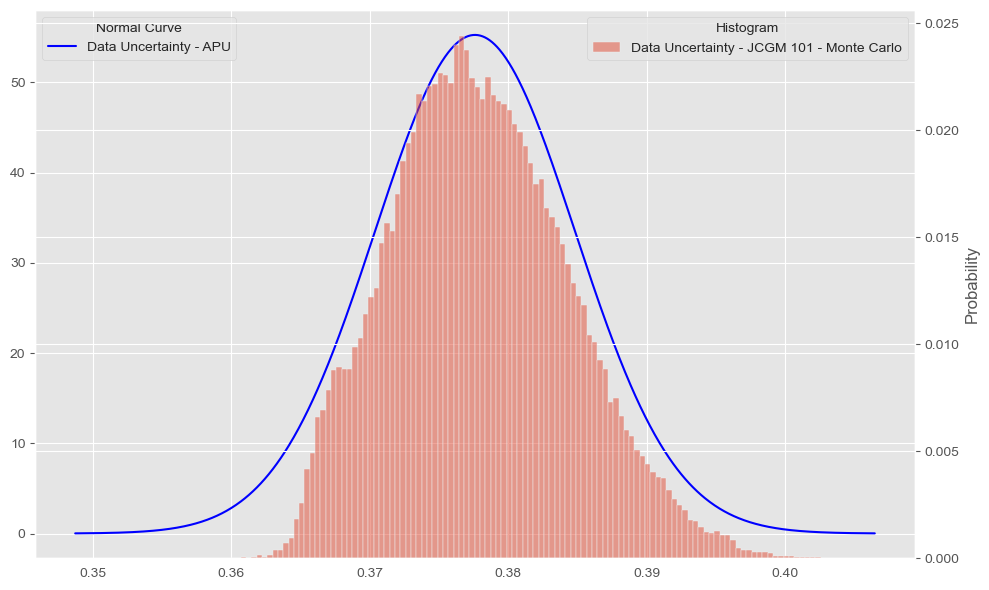

In [1166]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
plt.show()


# simulação mc v24

In [1168]:
i=24
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC24=np.std(previsão)
MMC24=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 523us/step


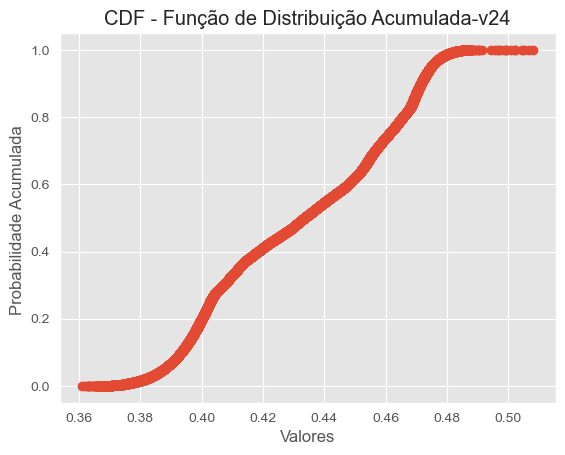

0    0.094501
dtype: float64


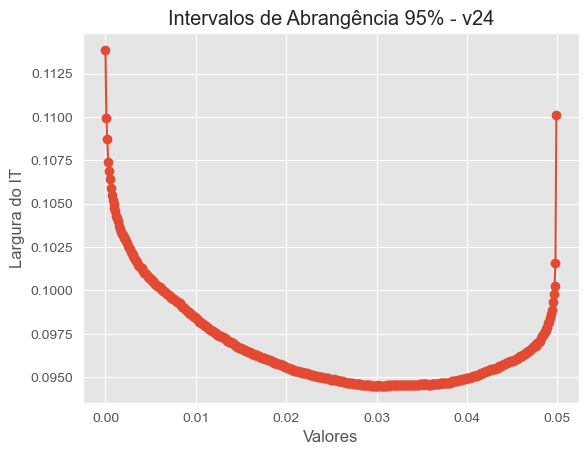

In [1169]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v24')
plt.grid(True)
plt.show()

minvalue_IT24 = res.min()
print(minvalue_IT24)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v24')
plt.grid(True)
plt.show()

In [1170]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_24= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_24= inverse_cdf(percentile2)
print(ymin_24)
print(ymax_24)

0.38416868448257446
0.47867149114608765


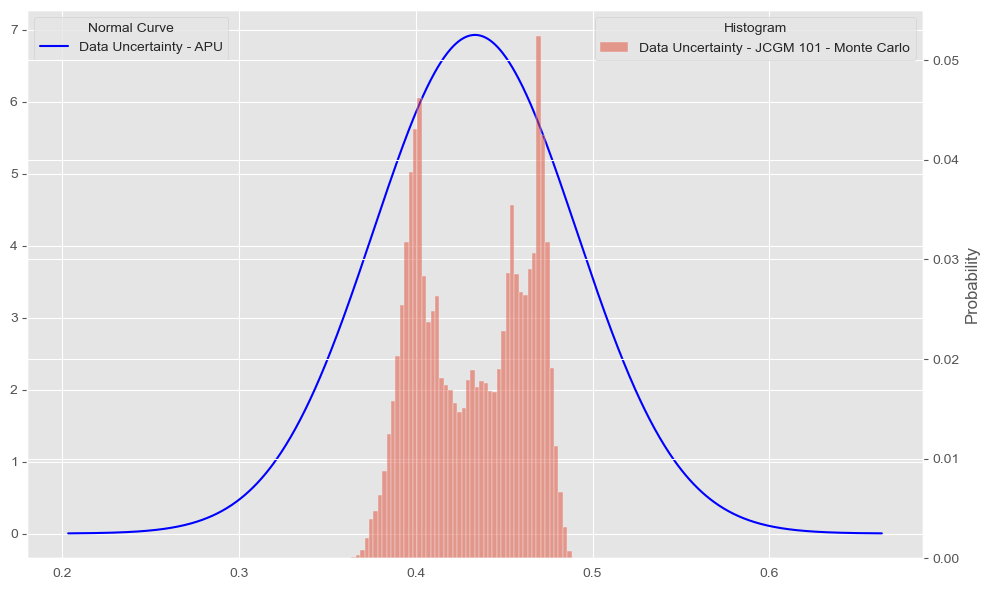

In [1171]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
plt.show()


# simulação mc v25

In [1174]:
i=25
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC25=np.std(previsão)
MMC25=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 524us/step


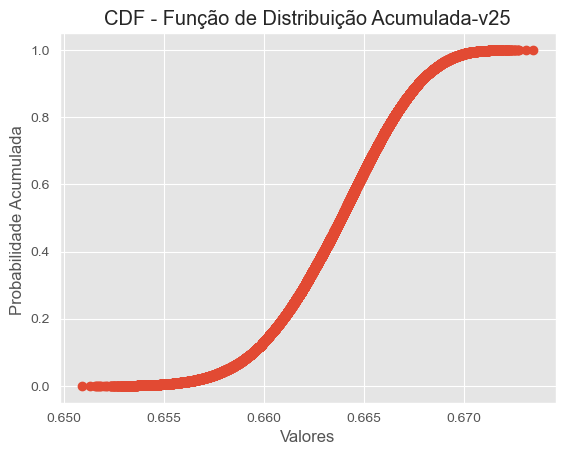

0    0.012166
dtype: float64


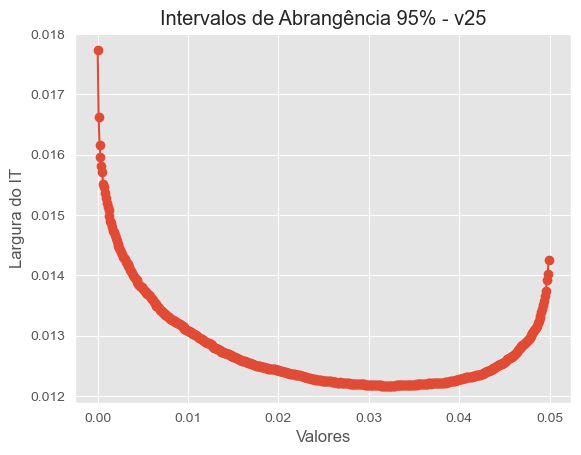

In [1175]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v25')
plt.grid(True)
plt.show()

minvalue_IT25 = res.min()
print(minvalue_IT25)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v25')
plt.grid(True)
plt.show()

In [1176]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_25= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_25= inverse_cdf(percentile2)
print(ymin_25)
print(ymax_25)

0.657529354095459
0.6696957945823669


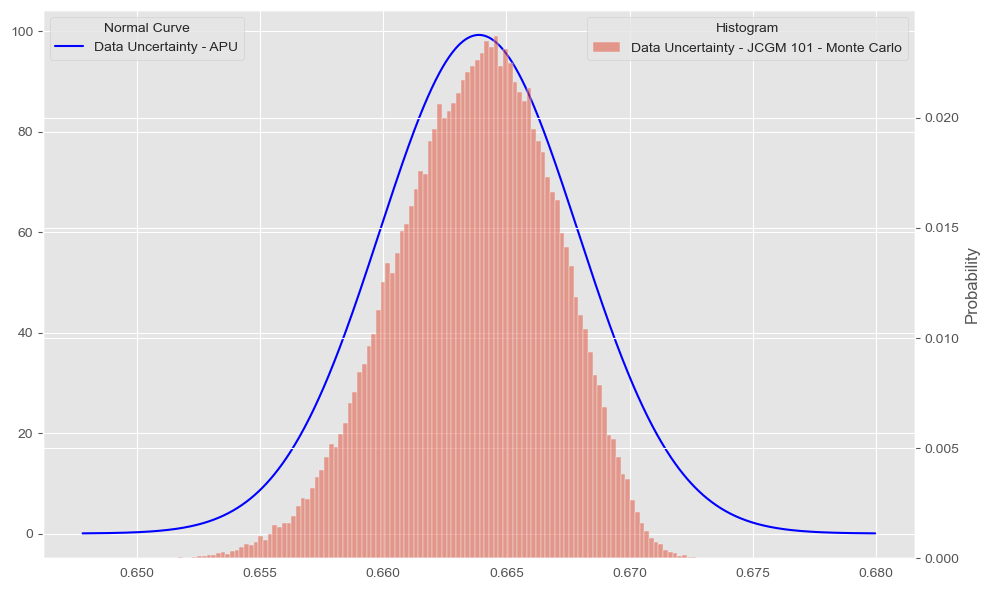

In [1177]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
plt.show()


# simulação mc v26

In [1179]:
i=26
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC26=np.std(previsão)
MMC26=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 588us/step


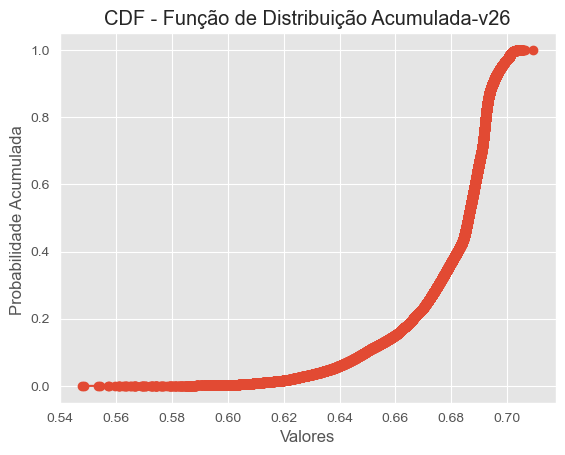

0    0.066775
dtype: float64


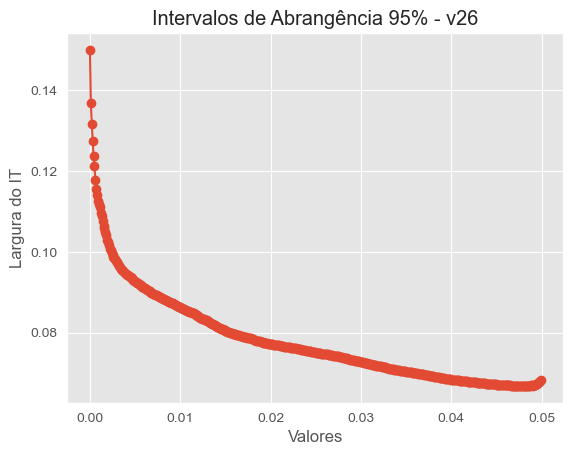

In [1180]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v26')
plt.grid(True)
plt.show()

minvalue_IT26 = res.min()
print(minvalue_IT26)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v26')
plt.grid(True)
plt.show()

In [1182]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_26= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_26= inverse_cdf(percentile2)
print(ymin_26)
print(ymax_26)

0.6362574100494385
0.7030331492424011


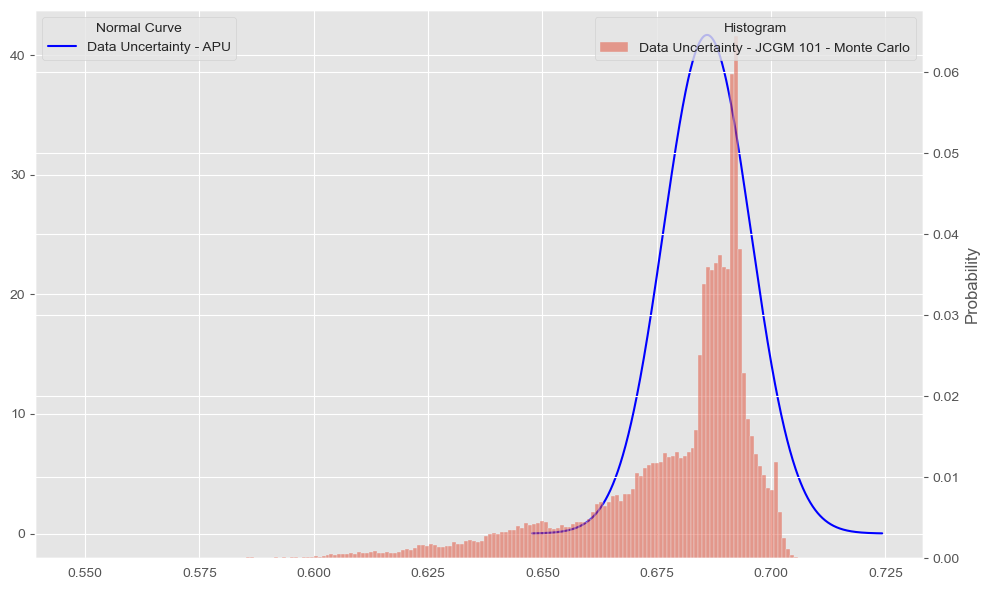

In [1184]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
plt.show()


# simulação mc v27

In [1202]:
i=27
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC27=np.std(previsão)
MMC27=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 537us/step


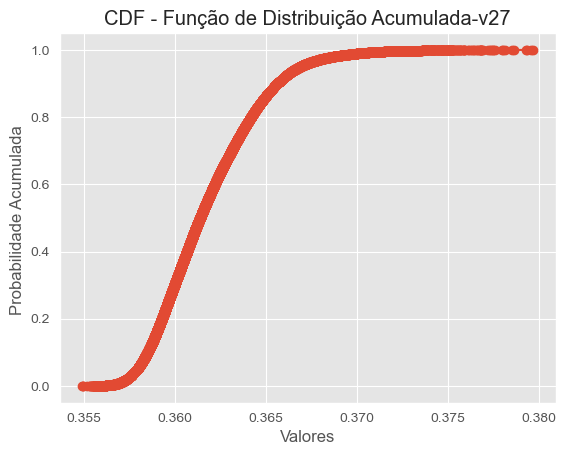

0    0.010291
dtype: float64


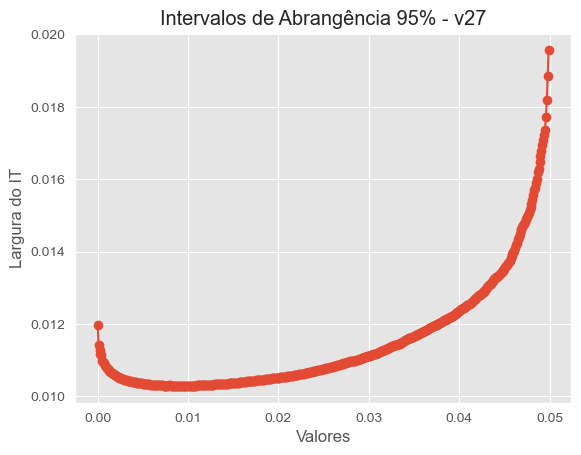

In [1203]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v27')
plt.grid(True)
plt.show()

minvalue_IT27 = res.min()
print(minvalue_IT27)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v27')
plt.grid(True)
plt.show()

In [1204]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_27= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_27= inverse_cdf(percentile2)
print(ymin_27)
print(ymax_27)

0.35696226358413696
0.3672541379928589


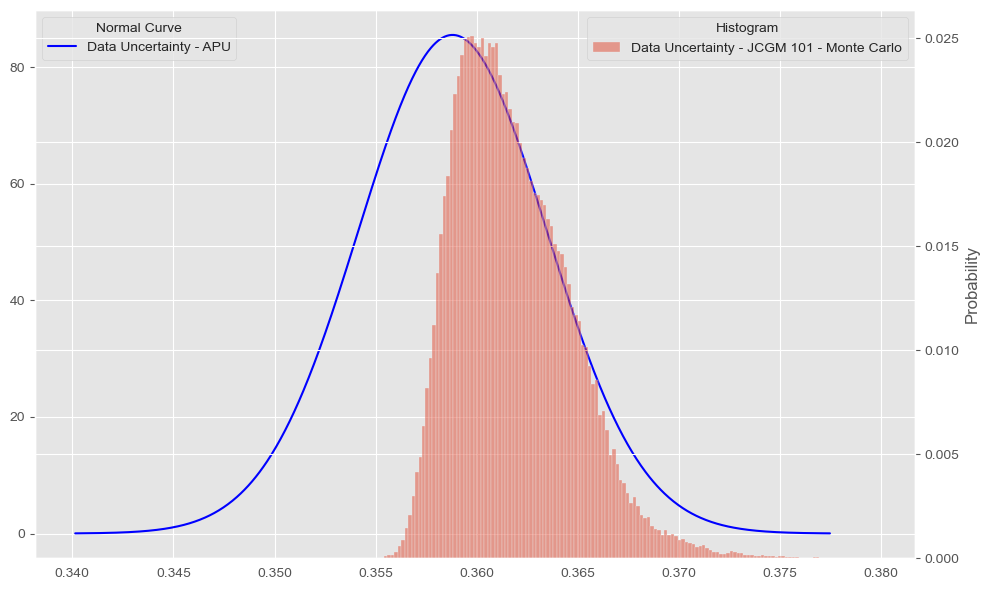

In [1206]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
plt.show()


# simulação mc v28

In [1208]:
i=28
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC28=np.std(previsão)
MMC28=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 532us/step


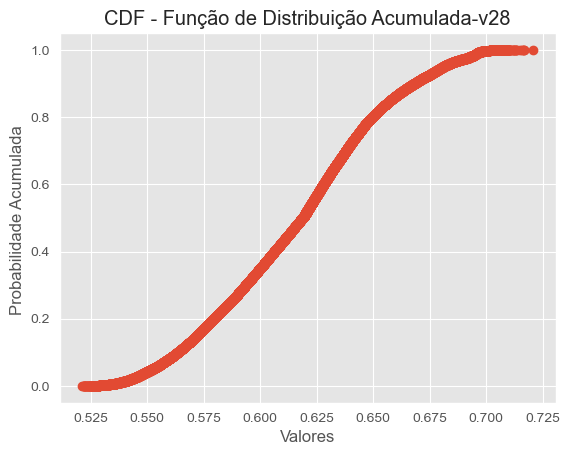

0    0.145289
dtype: float64


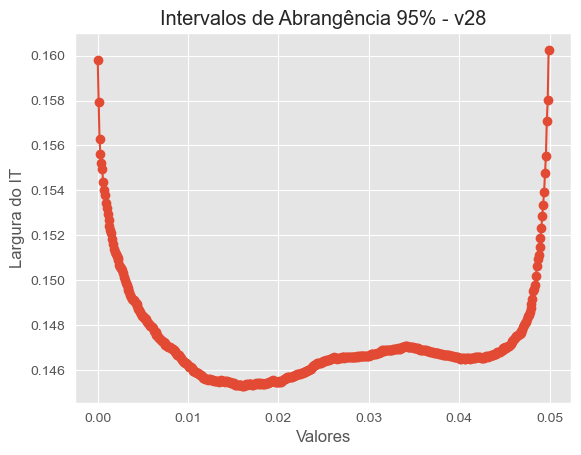

In [1210]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v28')
plt.grid(True)
plt.show()

minvalue_IT28 = res.min()
print(minvalue_IT28)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v28')
plt.grid(True)
plt.show()

In [1211]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_28= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_28= inverse_cdf(percentile2)
print(ymin_28)
print(ymax_28)

0.5413530468940735
0.6866421699523926


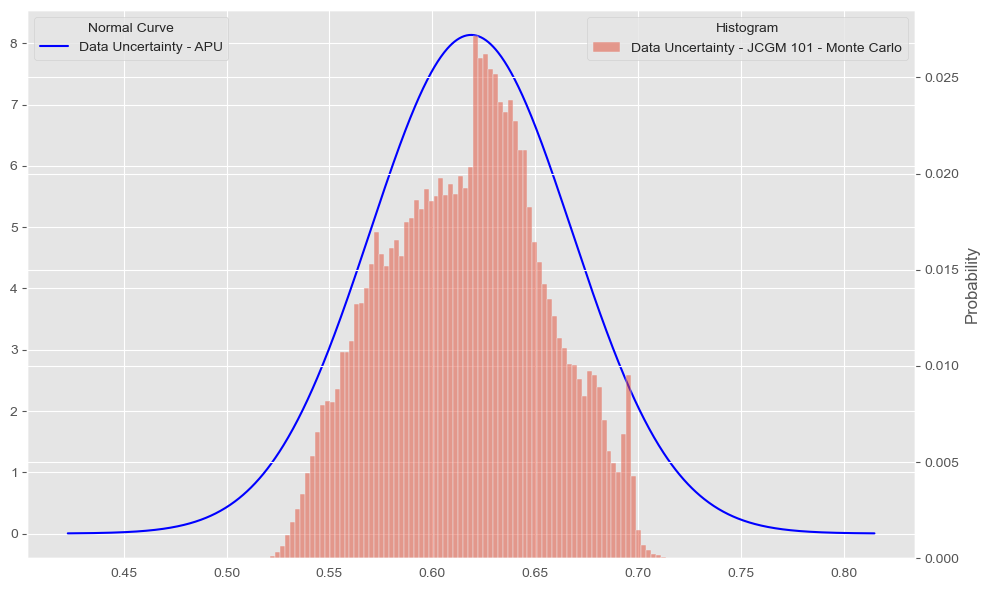

In [1212]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
plt.show()


# simulação mc v29

In [1260]:
i=29
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC29=np.std(previsão)
MMC29=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 518us/step


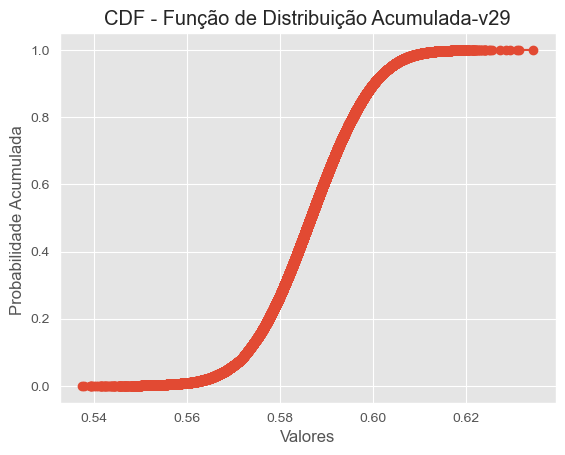

0    0.041605
dtype: float64


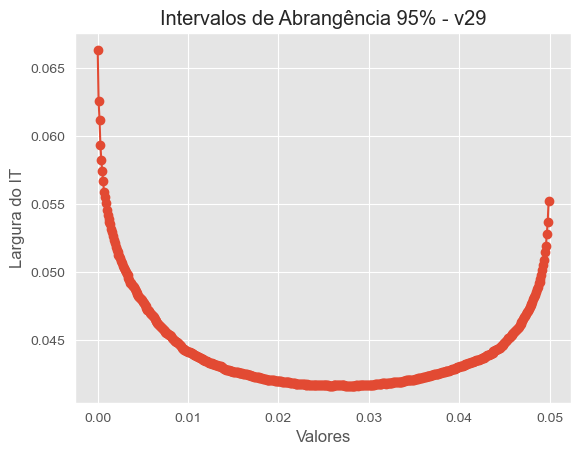

In [1261]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v29')
plt.grid(True)
plt.show()

minvalue_IT29 = res.min()
print(minvalue_IT29)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v29')
plt.grid(True)
plt.show()

In [1262]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_29= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_29= inverse_cdf(percentile2)
print(ymin_29)
print(ymax_29)

0.5659477710723877
0.6075537204742432


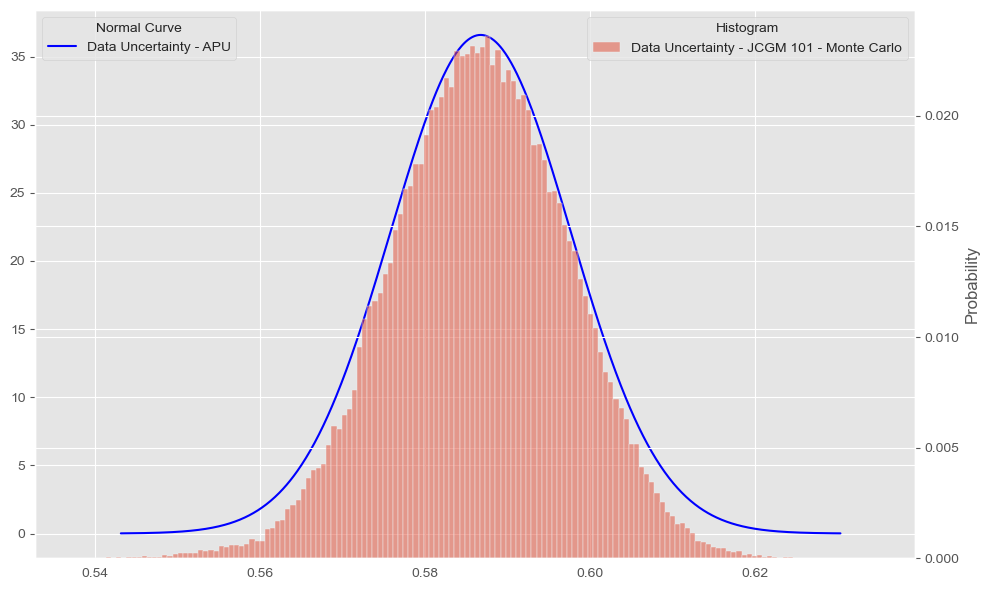

In [1265]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
fig.savefig('overlay_normal_curve_histogramperfeito.pdf')
plt.show()


# simulação mc v30

In [1220]:
i=30
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 100000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC30=np.std(previsão)
MMC30=np.mean(previsão)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 528us/step


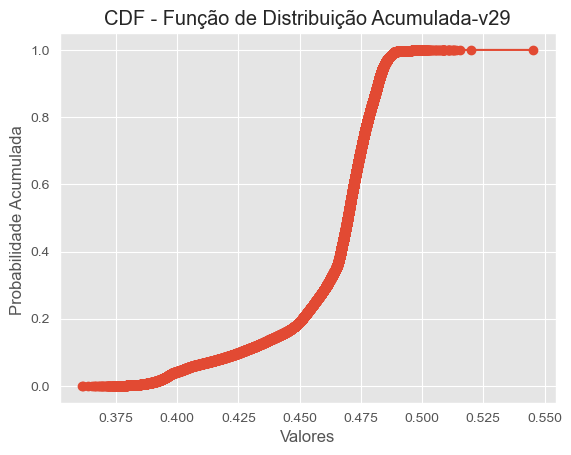

0    0.088305
dtype: float64


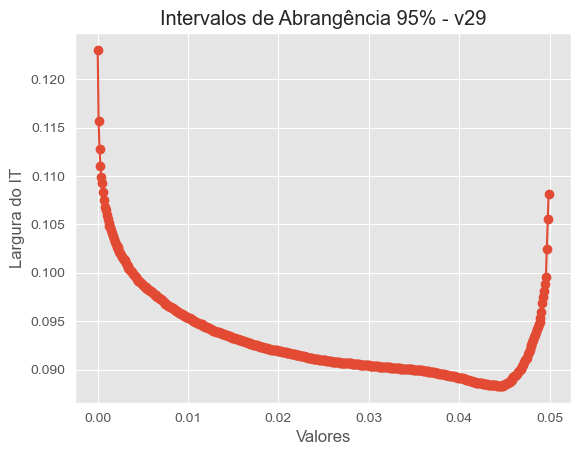

In [1221]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v29')
plt.grid(True)
plt.show()

minvalue_IT30 = res.min()
print(minvalue_IT30)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v29')
plt.grid(True)
plt.show()

In [1222]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_30= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_30= inverse_cdf(percentile2)
print(ymin_30)
print(ymax_30)

0.40099579095840454
0.4893079698085785


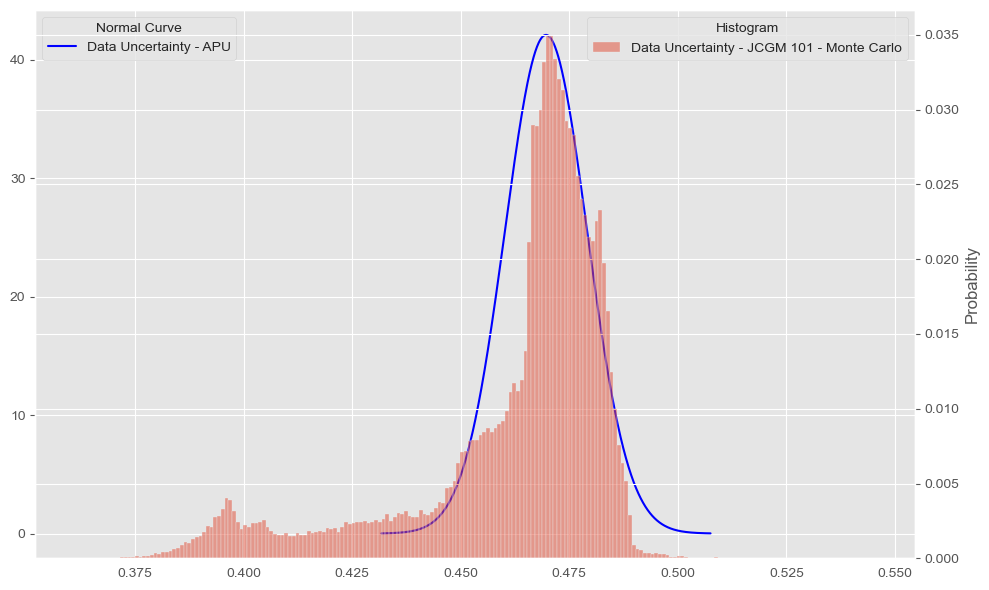

In [1224]:
# Ignorando os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parâmetros da distribuição normal para o gráfico 1
media1 = MCCC.iloc[i, 1]  # média
desvio_padrao1 = MCCC.iloc[i, 2]  # desvio padrão

# Dados para o histograma
previsao = np.random.normal(media1, desvio_padrao1, 1000)  # Exemplo de dados de previsão

# Gerando os dados para o gráfico 1
x1 = np.linspace(media1 - 4*desvio_padrao1, media1 + 4*desvio_padrao1, 1000)
y1 = (1/(desvio_padrao1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - media1) / desvio_padrao1)**2)

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da curva normal
line1, = ax1.plot(x1, y1, label='Data Uncertainty - APU', color='blue')

# Criando um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Gráfico de histograma usando seaborn
hist = sns.histplot(previsão, kde=False, stat="probability", label='Data Uncertainty - JCGM 101 - Monte Carlo',color='orange',  ax=ax2)

# Configurações adicionais
#plt.title('Overlay of Normal Curve and Histogram')

#adicionando legendas separadas 
ax1.legend(loc='upper left', title='Normal Curve')
ax2.legend(loc='upper right', title='Histogram')

fig.tight_layout()  # Para ajustar layout
plt.show()


# Consolidação dos resultados 

In [875]:
UMC=[UMC0,UMC1,UMC2,UMC3,UMC4,UMC5,UMC6,UMC7,UMC8,UMC9,UMC10,UMC11,UMC12,UMC13,UMC14,UMC15,UMC16,UMC17,UMC18,UMC19,UMC20,UMC21,UMC22,UMC23,
     UMC24,UMC25,UMC26,UMC27,UMC28,UMC29,UMC30]

In [876]:
MMC=[MMC0,MMC1,MMC2,MMC3,MMC4,MMC5,MMC6,MMC7,MMC8,MMC9,MMC10,MMC11,MMC12,MMC13,MMC14,MMC15,MMC16,MMC17,MMC18,MMC19,MMC20,MMC21,MMC22,MMC23,
     MMC24,MMC25,MMC26,MMC27,MMC28,MMC29,MMC30]

In [877]:
YMIN=[ymin_0,ymin_1,ymin_2,ymin_3,ymin_4,ymin_5,ymin_6,ymin_7,ymin_8,ymin_9,ymin_10,ymin_11,ymin_12,ymin_13,ymin_14,ymin_15,ymin_16,ymin_17,ymin_18,ymin_19,ymin_20,ymin_21,ymin_22,ymin_23,ymin_24,ymin_25,ymin_26,ymin_27,ymin_28,ymin_29,ymin_30,]

In [878]:
YMAX=[ymax_0,ymax_1,ymax_2,ymax_3,ymax_4,ymax_5,ymax_6,ymax_7,ymax_8,ymax_9,ymax_10,ymax_11,ymax_12,ymax_13,ymax_14,ymax_15,ymax_16,ymax_17,ymax_18,ymax_19,ymax_20,ymax_21,ymax_22,ymax_23,ymax_24,ymax_25,ymax_26,ymax_27,ymax_28,ymax_29,ymax_30,]

In [879]:
UMC=pd.DataFrame(UMC)